In [1]:
import pandas as pd
pd.set_option('max_columns', 50)
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger

matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns
import pandas_bokeh
from bokeh.plotting import Figure, show, output_notebook
from bokeh.layouts import layout
output_notebook()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('plotting.backend', 'pandas_bokeh')

Loading BokehJS ...

# World Happiness Report Evaluation 2015 - 2021

The data files for the World Happiness Reports for years 2015 - 2019 were taken from Kaggle ( https://www.kaggle.com/datasets/unsdsn/world-happiness) , a third party data source. Unfortunately Kaggle never had the data of years 2020 or 2021 and this was taken directly from the World Happiness Report Website (https://worldhappiness.report/ed/2024/#appendices-and-data).

The World Happiness Report is a landmark survey of the state of global happiness.he reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness

# How is the Happiness Score calculated?

The happiness score or subjective well-being, often referred to as the Cantril ladder, represents the national average response to the question of life evaluations. This score is derived from data collected by the Gallup World Poll and is based on answers to a specific life evaluation question. Respondents are asked to imagine a ladder, where the top rung represents the best possible life (scored as 10) and the bottom rung represents the worst possible life (scored as 0). They then rate their own current lives on this scale.

The Cantril ladder scores are obtained from nationally representative samples spanning the years 2015 to 2021. To ensure the estimates are representative, Gallup applies weighting to the data. The overall score is a composite of six key variables:

GDP per Capita of the country or region, Social Support, Healthy Life Expectancy, Freedom to Make Life Choices, Generosity and Perception of Corruption.

These factors collectively contribute to the assessment of subjective well-being across different populations and time periods

# Happiness Score Parameters


GPD per Capita - Country income divided by the population

Social Support - Having someone to count on when in need

Healthy Life Expectancy - Expected years of life in good health

Freedom to make life choices - Liberty to choose what to do in life

Generosity - Giving back to charities

Perception of Corruption - Same as Corruption Perceptions Index (CPI), a lower score means a very high corruption

# The Brief

You may be asking, why this topic? As someone whom has struggled with mental health myself, as well as observing many colleagues and loved ones undergo similar situations, I have often wondered if this has occurred as an outcome of the Covid outbreak in 2020 and whether other places in the world have undergone a similar effect. Before looking at the data, I had a pre-existing bias, I had assumed there would be a a drop in the overall happiness scores due to a number of reasons, firstly, many have lost many loved ones due to the virus and secondly, mental health awareness has become a forefront of health since 2020 allowing people to truly understand their mental well being better.

Another possibility is that as many more people were given the free time they have craved, people had the capacity to spend more quality time with their loved ones, more time to complete tasks they haven’t been able to accomplish due to lack of time, learn new hobbies, travel more locally and appreciate life in a whole new meaning. Peoples perspective and values have changed, which may have changed their happiness score.

Well, what do you think happened? Did you expect mental health scores to improve or drop due in 2020 and 2021? What did you experience? Not to worry, the world trends are not far away. 

# Pre-processing and data cleaning

In [2]:
df1=pd.read_csv('2015.csv')
df2=pd.read_csv('2016.csv')
df3=pd.read_csv('2017.csv')
df4=pd.read_csv('2018.csv')
df5=pd.read_csv('2019.csv')
df6=pd.read_csv('2020.csv')
df7=pd.read_csv('2021.csv')

In [3]:
df1.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [4]:
df1.shape

(158, 12)

In [5]:
df1.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
df2.head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

In [7]:
df2.tail()

Country                           Region  Happiness Rank  \
152        Benin               Sub-Saharan Africa             153   
153  Afghanistan                    Southern Asia             154   
154         Togo               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   

     Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
152            3.484                      3.404                      3.564   
153            3.360                      3.288                      3.432   
154            3.303                      3.192                      3.414   
155            3.069                      2.936                      3.202   
156            2.905                      2.732                      3.078   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
152                   0.39499  0.10419                   0.21028  0.39747   
153                   0.38227  0.11037                   0.17344  0.16430   
154                   0.28123  0.00000                   0.24811  0.34678   
155                   0.74719  0.14866                   0.62994  0.06912   
156                   0.06831  0.23442                   0.15747  0.04320   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
152                        0.06681     0.20180            2.10812  
153                        0.07112     0.31268            2.14558  
154                        0.11587     0.17517            2.13540  
155                        0.17233     0.48397            0.81789  
156                        0.09419     0.20290            2.10404

In [8]:
df2.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
df3.head()

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

In [10]:
df3.shape

(155, 12)

In [11]:
df3.tail()

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
150                    Rwanda             151            3.471      3.543030   
151                     Syria             152            3.462      3.663669   
152                  Tanzania             153            3.349      3.461430   
153                   Burundi             154            2.905      3.074690   
154  Central African Republic             155            2.693      2.864884   

     Whisker.low  Economy..GDP.per.Capita.    Family  \
150     3.398970                  0.368746  0.945707   
151     3.260331                  0.777153  0.396103   
152     3.236570                  0.511136  1.041990   
153     2.735310                  0.091623  0.629794   
154     2.521116                  0.000000  0.000000   

     Health..Life.Expectancy.   Freedom  Generosity  \
150                  0.326425  0.581844    0.252756   
151                  0.500533  0.081539    0.493664   
152                  0.364509  0.390018    0.354256   
153                  0.151611  0.059901    0.204435   
154                  0.018773  0.270842    0.280876   

     Trust..Government.Corruption.  Dystopia.Residual  
150                       0.455220           0.540061  
151                       0.151347           1.061574  
152                       0.066035           0.621130  
153                       0.084148           1.683024  
154                       0.056565           2.066005

In [12]:
df3.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [13]:
df4.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
3                      0.138  
4                      0.357

In [14]:
df4.tail()

Overall rank         Country or region  Score  GDP per capita  \
151           152                     Yemen  3.355           0.442   
152           153                  Tanzania  3.303           0.455   
153           154               South Sudan  3.254           0.337   
154           155  Central African Republic  3.083           0.024   
155           156                   Burundi  2.905           0.091   

     Social support  Healthy life expectancy  Freedom to make life choices  \
151           1.073                    0.343                         0.244   
152           0.991                    0.381                         0.481   
153           0.608                    0.177                         0.112   
154           0.000                    0.010                         0.305   
155           0.627                    0.145                         0.065   

     Generosity  Perceptions of corruption  
151       0.083                      0.064  
152       0.270                      0.097  
153       0.224                      0.106  
154       0.218                      0.038  
155       0.149                      0.076

In [15]:
df4.shape

(156, 9)

In [16]:
df4.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [17]:
df5.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [18]:
df5.tail()

Overall rank         Country or region  Score  GDP per capita  \
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  
151       0.217                      0.411  
152       0.276                      0.147  
153       0.158                      0.025  
154       0.235                      0.035  
155       0.202                      0.091

In [19]:
df5.shape

(156, 9)

In [20]:
df5.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [21]:
df6.head()

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe        7.8087   
1      Denmark     Western Europe        7.6456   
2  Switzerland     Western Europe        7.5599   
3      Iceland     Western Europe        7.5045   
4       Norway     Western Europe        7.4880   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                        0.031156      7.869766      7.747634   
1                        0.033492      7.711245      7.579955   
2                        0.035014      7.628528      7.491272   
3                        0.059616      7.621347      7.387653   
4                        0.034837      7.556281      7.419719   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0              10.639267        0.954330                71.900825   
1              10.774001        0.955991                72.402504   
2              10.979933        0.942847                74.102448   
3              10.772559        0.974670                73.000000   
4              11.087804        0.952487                73.200783   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                      0.949172   -0.059482                   0.195445   
1                      0.951444    0.066202                   0.168489   
2                      0.921337    0.105911                   0.303728   
3                      0.948892    0.246944                   0.711710   
4                      0.955750    0.134533                   0.263218   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                  1.972317                          1.285190   
1                  1.972317                          1.326949   
2                  1.972317                          1.390774   
3                  1.972317                          1.326502   
4                  1.972317                          1.424207   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                      1.499526                               0.961271   
1                      1.503449                               0.979333   
2                      1.472403                               1.040533   
3                      1.547567                               1.000843   
4                      1.495173                               1.008072   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                    0.662317                  0.159670   
1                                    0.665040                  0.242793   
2                                    0.628954                  0.269056   
3                                    0.661981                  0.362330   
4                                    0.670201                  0.287985   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                 0.477857             2.762835  
1                                 0.495260             2.432741  
2                                 0.407946             2.350267  
3                                 0.144541             2.460688  
4                                 0.434101             2.168266

In [22]:
df6.tail()

Country name  Regional indicator  Ladder score  \
148  Central African Republic  Sub-Saharan Africa        3.4759   
149                    Rwanda  Sub-Saharan Africa        3.3123   
150                  Zimbabwe  Sub-Saharan Africa        3.2992   
151               South Sudan  Sub-Saharan Africa        2.8166   
152               Afghanistan          South Asia        2.5669   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
148                        0.115183      3.701658      3.250141   
149                        0.052425      3.415053      3.209547   
150                        0.058674      3.414202      3.184198   
151                        0.107610      3.027516      2.605684   
152                        0.031311      2.628270      2.505530   

     Logged GDP per capita  Social support  Healthy life expectancy  \
148               6.625160        0.319460                45.200001   
149               7.600104        0.540835                61.098846   
150               7.865712        0.763093                55.617260   
151               7.425360        0.553707                51.000000   
152               7.462861        0.470367                52.590000   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
148                      0.640881    0.082410                   0.891807   
149                      0.900589    0.055484                   0.183541   
150                      0.711458   -0.072064                   0.810237   
151                      0.451314    0.016519                   0.763417   
152                      0.396573   -0.096429                   0.933687   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
148                  1.972317                          0.041072   
149                  1.972317                          0.343243   
150                  1.972317                          0.425564   
151                  1.972317                          0.289083   
152                  1.972317                          0.300706   

     Explained by: Social support  Explained by: Healthy life expectancy  \
148                      0.000000                               0.000000   
149                      0.522876                               0.572383   
150                      1.047835                               0.375038   
151                      0.553279                               0.208809   
152                      0.356434                               0.266052   

     Explained by: Freedom to make life choices  Explained by: Generosity  \
148                                    0.292814                  0.253513   
149                                    0.604088                  0.235705   
150                                    0.377405                  0.151349   
151                                    0.065609                  0.209935   
152                                    0.000000                  0.135235   

     Explained by: Perceptions of corruption  Dystopia + residual  
148                                 0.028265             2.860198  
149                                 0.485542             0.548445  
150                                 0.080929             0.841031  
151                                 0.111157             1.378751  
152                                 0.001226             1.507236

In [23]:
df6.shape

(153, 20)

In [24]:
df6.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [25]:
df7.head()

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919       0.025                      0.292   
3                         0.955       0.160                      0.673   
4                         0.913       0.175                      0.338   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   
2                      2.43                             1.566   
3                      2.43                             1.482   
4                      2.43                             1.501   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.106                                  0.741   
1                         1.108                                  0.763   
2                         1.079                                  0.816   
3                         1.172                                  0.772   
4                         1.079                                  0.753   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   
2                                       0.653                     0.204   
3                                       0.698                     0.293   
4                                       0.647                     0.302   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.481                3.253  
1                                    0.485                2.868  
2                                    0.413                2.839  
3                                    0.170                2.967  
4                                    0.384                2.798

In [26]:
df7.tail()

Country name  Regional indicator  Ladder score  \
144      Lesotho  Sub-Saharan Africa         3.512   
145     Botswana  Sub-Saharan Africa         3.467   
146       Rwanda  Sub-Saharan Africa         3.415   
147     Zimbabwe  Sub-Saharan Africa         3.145   
148  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
144                           0.120         3.748         3.276   
145                           0.074         3.611         3.322   
146                           0.068         3.548         3.282   
147                           0.058         3.259         3.030   
148                           0.038         2.596         2.449   

     Logged GDP per capita  Social support  Healthy life expectancy  \
144                  7.926           0.787                   48.700   
145                  9.782           0.784                   59.269   
146                  7.676           0.552                   61.400   
147                  7.943           0.750                   56.201   
148                  7.695           0.463                   52.493   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
144                         0.715      -0.131                      0.915   
145                         0.824      -0.246                      0.801   
146                         0.897       0.061                      0.167   
147                         0.677      -0.047                      0.821   
148                         0.382      -0.102                      0.924   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
144                      2.43                             0.451   
145                      2.43                             1.099   
146                      2.43                             0.364   
147                      2.43                             0.457   
148                      2.43                             0.370   

     Explained by: Social support  Explained by: Healthy life expectancy  \
144                         0.731                                  0.007   
145                         0.724                                  0.340   
146                         0.202                                  0.407   
147                         0.649                                  0.243   
148                         0.000                                  0.126   

     Explained by: Freedom to make life choices  Explained by: Generosity  \
144                                       0.405                     0.103   
145                                       0.539                     0.027   
146                                       0.627                     0.227   
147                                       0.359                     0.157   
148                                       0.000                     0.122   

     Explained by: Perceptions of corruption  Dystopia + residual  
144                                    0.015                1.800  
145                                    0.088                0.648  
146                                    0.493                1.095  
147                                    0.075                1.205  
148                                    0.010                1.895

In [27]:
df7.shape

(149, 20)

In [28]:
df7.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [29]:
O_rank=[]
count = 1
for i in range (153):
    O_rank.append(count)
    count+=1
df6['Overall rank'] = O_rank
df6.head()

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe        7.8087   
1      Denmark     Western Europe        7.6456   
2  Switzerland     Western Europe        7.5599   
3      Iceland     Western Europe        7.5045   
4       Norway     Western Europe        7.4880   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                        0.031156      7.869766      7.747634   
1                        0.033492      7.711245      7.579955   
2                        0.035014      7.628528      7.491272   
3                        0.059616      7.621347      7.387653   
4                        0.034837      7.556281      7.419719   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0              10.639267        0.954330                71.900825   
1              10.774001        0.955991                72.402504   
2              10.979933        0.942847                74.102448   
3              10.772559        0.974670                73.000000   
4              11.087804        0.952487                73.200783   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                      0.949172   -0.059482                   0.195445   
1                      0.951444    0.066202                   0.168489   
2                      0.921337    0.105911                   0.303728   
3                      0.948892    0.246944                   0.711710   
4                      0.955750    0.134533                   0.263218   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                  1.972317                          1.285190   
1                  1.972317                          1.326949   
2                  1.972317                          1.390774   
3                  1.972317                          1.326502   
4                  1.972317                          1.424207   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                      1.499526                               0.961271   
1                      1.503449                               0.979333   
2                      1.472403                               1.040533   
3                      1.547567                               1.000843   
4                      1.495173                               1.008072   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                    0.662317                  0.159670   
1                                    0.665040                  0.242793   
2                                    0.628954                  0.269056   
3                                    0.661981                  0.362330   
4                                    0.670201                  0.287985   

   Explained by: Perceptions of corruption  Dystopia + residual  Overall rank  
0                                 0.477857             2.762835             1  
1                                 0.495260             2.432741             2  
2                                 0.407946             2.350267             3  
3                                 0.144541             2.460688             4  
4                                 0.434101             2.168266             5

In [30]:
OR=[]
count = 1
for i in range (149):
    OR.append(count)
    count+=1
df7['Overall rank'] = OR
df7.head()

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919       0.025                      0.292   
3                         0.955       0.160                      0.673   
4                         0.913       0.175                      0.338   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   
2                      2.43                             1.566   
3                      2.43                             1.482   
4                      2.43                             1.501   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.106                                  0.741   
1                         1.108                                  0.763   
2                         1.079                                  0.816   
3                         1.172                                  0.772   
4                         1.079                                  0.753   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   
2                                       0.653                     0.204   
3                                       0.698                     0.293   
4                                       0.647                     0.302   

   Explained by: Perceptions of corruption  Dystopia + residual  Overall rank  
0                                    0.481                3.253             1  
1                                    0.485                2.868             2  
2                                    0.413                2.839             3  
3                                    0.170                2.967             4  
4                                    0.384                2.798             5

In [31]:
OR=[]
count = 1
for i in range (149):
    OR.append(count)
    count+=1
df7['Overall rank'] = OR
df7.head()

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919       0.025                      0.292   
3                         0.955       0.160                      0.673   
4                         0.913       0.175                      0.338   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   
2                      2.43                             1.566   
3                      2.43                             1.482   
4                      2.43                             1.501   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.106                                  0.741   
1                         1.108                                  0.763   
2                         1.079                                  0.816   
3                         1.172                                  0.772   
4                         1.079                                  0.753   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   
2                                       0.653                     0.204   
3                                       0.698                     0.293   
4                                       0.647                     0.302   

   Explained by: Perceptions of corruption  Dystopia + residual  Overall rank  
0                                    0.481                3.253             1  
1                                    0.485                2.868             2  
2                                    0.413                2.839             3  
3                                    0.170                2.967             4  
4                                    0.384                2.798             5

After reviewing all sevent dataframes, it was evident I needed to align the coloumns, coloumn names and countries assessed in order to make the data comparative.

In [32]:
df1.drop('Dystopia Residual',axis = 1,  inplace = True)
df2.drop('Dystopia Residual',axis = 1,  inplace = True)
df3.drop('Dystopia.Residual',axis = 1,  inplace = True)

In [33]:
df1.drop('Region',axis = 1,  inplace = True)
df2.drop('Region',axis = 1,  inplace = True)

In [34]:
df1.drop('Standard Error', axis = 1, inplace = True)
df2.drop('Lower Confidence Interval', axis = 1, inplace = True)
df2.drop('Upper Confidence Interval', axis = 1, inplace = True)
df3.drop('Whisker.high', axis = 1, inplace = True)
df3.drop('Whisker.low', axis = 1, inplace = True)

In [35]:
df6.drop('Regional indicator', axis = 1, inplace = True)
df6.drop('Standard error of ladder score', axis = 1, inplace = True)
df6.drop('upperwhisker', axis = 1, inplace = True)
df6.drop('lowerwhisker', axis = 1, inplace = True)
df6.drop('Logged GDP per capita', axis = 1, inplace = True)
df6.drop('Social support', axis = 1, inplace = True)
df6.drop('Healthy life expectancy', axis = 1, inplace = True)
df6.drop('Freedom to make life choices', axis = 1, inplace = True)
df6.drop('Generosity', axis = 1, inplace = True)
df6.drop('Perceptions of corruption', axis = 1, inplace = True)
df6.drop('Ladder score in Dystopia', axis = 1, inplace = True)
df6.drop('Dystopia + residual', axis = 1, inplace = True)

In [36]:
df7.drop('Regional indicator', axis = 1, inplace = True)
df7.drop('Standard error of ladder score', axis = 1, inplace = True)
df7.drop('upperwhisker', axis = 1, inplace = True)
df7.drop('lowerwhisker', axis = 1, inplace = True)
df7.drop('Logged GDP per capita', axis = 1, inplace = True)
df7.drop('Social support', axis = 1, inplace = True)
df7.drop('Healthy life expectancy', axis = 1, inplace = True)
df7.drop('Freedom to make life choices', axis = 1, inplace = True)
df7.drop('Generosity', axis = 1, inplace = True)
df7.drop('Perceptions of corruption', axis = 1, inplace = True)
df7.drop('Ladder score in Dystopia', axis = 1, inplace = True)
df7.drop('Dystopia + residual', axis = 1, inplace = True)

In [37]:
df1_rename_mask ={'Country': 'Country or region',
              'Happiness Rank':'Overall rank',
             'Happiness Score': 'Score',
             'Economy (GDP per Capita)': 'GDP per capita',
             'Health (Life Expectancy)': 'Healthy life expectancy',
             'Freedom': 'Freedom to make life choices',
             'Family': 'Social support',
             'Trust (Government Corruption)': 'Perceptions of corruption'}

df1 = df1.rename(columns = df1_rename_mask)

In [38]:
df2_rename_mask ={'Country': 'Country or region',
              'Happiness Rank':'Overall rank',
             'Happiness Score': 'Score',
             'Economy (GDP per Capita)': 'GDP per capita',
             'Health (Life Expectancy)': 'Healthy life expectancy',
             'Freedom': 'Freedom to make life choices',
             'Family': 'Social support',
             'Trust (Government Corruption)': 'Perceptions of corruption'}

df2 = df2.rename(columns = df2_rename_mask)

In [39]:
df3_rename_mask ={'Country': 'Country or region',
              'Happiness.Rank':'Overall rank',
             'Happiness.Score': 'Score',
             'Economy..GDP.per.Capita.': 'GDP per capita',
             'Health..Life.Expectancy.': 'Healthy life expectancy',
             'Freedom': 'Freedom to make life choices',
             'Family': 'Social support',
             'Trust..Government.Corruption.': 'Perceptions of corruption'}

df3 = df3.rename(columns = df3_rename_mask)

In [40]:
df6_rename_mask ={'Country name': 'Country or region',
             'Ladder score': 'Score',
             'Explained by: Log GDP per capita': 'GDP per capita',
             'Explained by: Healthy life expectancy': 'Healthy life expectancy',
             'Explained by: Freedom to make life choices': 'Freedom to make life choices',
             'Explained by: Social support': 'Social support',
             'Explained by: Generosity': 'Generosity',
             'Explained by: Perceptions of corruption': 'Perceptions of corruption'}

df6 = df6.rename(columns = df6_rename_mask)
df6.head()

Country or region   Score  GDP per capita  Social support  \
0           Finland  7.8087        1.285190        1.499526   
1           Denmark  7.6456        1.326949        1.503449   
2       Switzerland  7.5599        1.390774        1.472403   
3           Iceland  7.5045        1.326502        1.547567   
4            Norway  7.4880        1.424207        1.495173   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                 0.961271                      0.662317    0.159670   
1                 0.979333                      0.665040    0.242793   
2                 1.040533                      0.628954    0.269056   
3                 1.000843                      0.661981    0.362330   
4                 1.008072                      0.670201    0.287985   

   Perceptions of corruption  Overall rank  
0                   0.477857             1  
1                   0.495260             2  
2                   0.407946             3  
3                   0.144541             4  
4                   0.434101             5

In [41]:
df7_rename_mask ={'Country name': 'Country or region',
             'Ladder score': 'Score',
             'Explained by: Log GDP per capita': 'GDP per capita',
             'Explained by: Healthy life expectancy': 'Healthy life expectancy',
             'Explained by: Freedom to make life choices': 'Freedom to make life choices',
             'Explained by: Social support': 'Social support',
             'Explained by: Generosity': 'Generosity',
             'Explained by: Perceptions of corruption': 'Perceptions of corruption'}

df7 = df7.rename(columns = df7_rename_mask)
df7.head()

Country or region  Score  GDP per capita  Social support  \
0           Finland  7.842           1.446           1.106   
1           Denmark  7.620           1.502           1.108   
2       Switzerland  7.571           1.566           1.079   
3           Iceland  7.554           1.482           1.172   
4       Netherlands  7.464           1.501           1.079   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.741                         0.691       0.124   
1                    0.763                         0.686       0.208   
2                    0.816                         0.653       0.204   
3                    0.772                         0.698       0.293   
4                    0.753                         0.647       0.302   

   Perceptions of corruption  Overall rank  
0                      0.481             1  
1                      0.485             2  
2                      0.413             3  
3                      0.170             4  
4                      0.384             5

In [42]:
countries20 = df6['Country or region']

c20=[]
for i in countries20:
    c20.append(i)
c20.sort()
c20

['Afghanistan',
 'Albania',
 'Algeria',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Haiti',
 'Honduras',
 'Hong Kong S.A.R. of China',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Lebanon'

In [43]:
notin2015 = df1[~df1['Country or region'].isin(c20)]['Country or region'].tolist()
display(df1.loc[df1['Country or region'].isin(notin2015)])

Country or region  Overall rank  Score  GDP per capita  Social support  \
21                Oman            22  6.853         1.36011         1.08182   
27               Qatar            28  6.611         1.69042         1.07860   
37              Taiwan            38  6.298         1.29098         1.07617   
39            Suriname            40  6.269         0.99534         0.97200   
71           Hong Kong            72  5.474         1.38604         1.05818   
78              Bhutan            79  5.253         0.77042         1.10395   
90   Somaliland region            91  5.057         0.18847         0.95152   
117              Sudan           118  4.550         0.52107         1.01404   
125           Djibouti           126  4.369         0.44025         0.59207   
136             Angola           137  4.033         0.75778         0.86040   
155              Syria           156  3.006         0.66320         0.47489   

     Healthy life expectancy  Freedom to make life choices  \
21                   0.76276                       0.63274   
27                   0.79733                       0.64040   
37                   0.87530                       0.39740   
39                   0.60820                       0.59657   
71                   1.01328                       0.59608   
78                   0.57407                       0.53206   
90                   0.43873                       0.46582   
117                  0.36878                       0.10081   
125                  0.36291                       0.46074   
136                  0.16683                       0.10384   
155                  0.72193                       0.15684   

     Perceptions of corruption  Generosity  
21                     0.32524     0.21542  
27                     0.52208     0.32573  
37                     0.08129     0.25376  
39                     0.13633     0.16991  
71                     0.37124     0.39478  
78                     0.15445     0.47998  
90                     0.39928     0.50318  
117                    0.14660     0.19062  
125                    0.28105     0.18093  
136                    0.07122     0.12344  
155                    0.18906     0.47179

In [44]:
df1.drop([21,136,125,27,90,155,117,78,39], inplace=True)

df1.replace(to_replace= 'Hong Kong', value='Hong Kong S.A.R. of China')
df1.replace(to_replace= 'Taiwan', value='Taiwan Province of China')

Country or region  Overall rank  Score  GDP per capita  Social support  \
0         Switzerland             1  7.587         1.39651         1.34951   
1             Iceland             2  7.561         1.30232         1.40223   
2             Denmark             3  7.527         1.32548         1.36058   
3              Norway             4  7.522         1.45900         1.33095   
4              Canada             5  7.427         1.32629         1.32261   
..                ...           ...    ...             ...             ...   
152       Afghanistan           153  3.575         0.31982         0.30285   
153            Rwanda           154  3.465         0.22208         0.77370   
154             Benin           155  3.340         0.28665         0.35386   
156           Burundi           157  2.905         0.01530         0.41587   
157              Togo           158  2.839         0.20868         0.13995   

     Healthy life expectancy  Freedom to make life choices  \
0                    0.94143                       0.66557   
1                    0.94784                       0.62877   
2                    0.87464                       0.64938   
3                    0.88521                       0.66973   
4                    0.90563                       0.63297   
..                       ...                           ...   
152                  0.30335                       0.23414   
153                  0.42864                       0.59201   
154                  0.31910                       0.48450   
156                  0.22396                       0.11850   
157                  0.28443                       0.36453   

     Perceptions of corruption  Generosity  
0                      0.41978     0.29678  
1                      0.14145     0.43630  
2                      0.48357     0.34139  
3                      0.36503     0.34699  
4                      0.32957     0.45811  
..                         ...         ...  
152                    0.09719     0.36510  
153                    0.55191     0.22628  
154                    0.08010     0.18260  
156                    0.10062     0.19727  
157                    0.10731     0.16681  

[149 rows x 9 columns]

In [45]:
notin2016 = df2[~df2['Country or region'].isin(c20)]['Country or region'].tolist()
display(df2.loc[df2['Country or region'].isin(notin2016)])

Country or region  Overall rank  Score  GDP per capita  Social support  \
14         Puerto Rico            15  7.039         1.35943         1.08113   
34              Taiwan            34  6.379         1.39729         0.92624   
35               Qatar            36  6.375         1.82427         0.87964   
39            Suriname            40  6.269         1.09686         0.77866   
51              Belize            52  5.956         0.87616         0.68655   
74           Hong Kong            75  5.458         1.51070         0.87021   
75             Somalia            76  5.440         0.00000         0.33613   
83              Bhutan            84  5.196         0.85270         0.90836   
96   Somaliland Region            97  5.057         0.25558         0.75862   
132              Sudan           133  4.139         0.63069         0.81928   
140             Angola           141  3.866         0.84731         0.66366   
155              Syria           156  3.069         0.74719         0.14866   

     Healthy life expectancy  Freedom to make life choices  \
14                   0.77758                       0.46823   
34                   0.79565                       0.32377   
35                   0.71723                       0.56679   
39                   0.50933                       0.52234   
51                   0.45569                       0.51231   
74                   0.95277                       0.48079   
75                   0.11466                       0.56778   
83                   0.49759                       0.46074   
96                   0.33108                       0.39130   
132                  0.29759                       0.00000   
140                  0.04991                       0.00589   
155                  0.62994                       0.06912   

     Perceptions of corruption  Generosity  
14                     0.12275     0.22202  
34                     0.06630     0.25495  
35                     0.48049     0.32388  
39                     0.12692     0.16665  
51                     0.10771     0.23684  
74                     0.31647     0.40097  
75                     0.31180     0.27225  
83                     0.16160     0.48546  
96                     0.36794     0.51479  
132                    0.10039     0.18077  
140                    0.08434     0.12071  
155                    0.17233     0.48397

In [46]:
df2.drop([15, 35, 39, 51, 75, 83, 96, 140, 155],inplace=True)

df2.replace('Hong Kong','Hong Kong S.A.R. of China', inplace = True)
df2.replace('Taiwan','Taiwan Province of China', inplace = True)

In [47]:
notin2017 = df3[~df3['Country or region'].isin(c20)]['Country or region'].tolist()
display(df3.loc[df3['Country or region'].isin(notin2017)])

Country or region  Overall rank  Score  GDP per capita  \
34                     Qatar            35  6.375        1.870766   
49                    Belize            50  5.956        0.907975   
70   Hong Kong S.A.R., China            71  5.472        1.551675   
92                   Somalia            93  5.151        0.022643   
96                    Bhutan            97  5.011        0.885416   
129                    Sudan           130  4.139        0.659517   
139                   Angola           140  3.795        0.858428   
151                    Syria           152  3.462        0.777153   

     Social support  Healthy life expectancy  Freedom to make life choices  \
34         1.274297                 0.710098                      0.604131   
49         1.081418                 0.450192                      0.547509   
70         1.262791                 0.943062                      0.490969   
92         0.721151                 0.113989                      0.602127   
96         1.340127                 0.495879                      0.501538   
129        1.214009                 0.290921                      0.014996   
139        1.104412                 0.049869                      0.000000   
151        0.396103                 0.500533                      0.081539   

     Generosity  Perceptions of corruption  
34     0.330474                   0.439299  
49     0.240016                   0.096581  
70     0.374466                   0.293934  
92     0.291631                   0.282410  
96     0.474055                   0.173380  
129    0.182317                   0.089848  
139    0.097926                   0.069720  
151    0.493664                   0.151347

In [48]:
df3.drop([34,49,92,96,129,139,151],inplace=True)

df3.replace('Hong Kong S.A.R., China','Hong Kong S.A.R. of China', inplace = True)

In [49]:
notin2018 = df4[~df4['Country or region'].isin(c20)]['Country or region'].tolist()
display(df4.loc[df4['Country or region'].isin(notin2018)])

Overall rank  Country or region  Score  GDP per capita  Social support  \
25             26             Taiwan  6.441           1.365           1.436   
31             32              Qatar  6.374           1.649           1.303   
37             38  Trinidad & Tobago  6.192           1.223           1.492   
48             49             Belize  5.956           0.807           1.101   
57             58    Northern Cyprus  5.835           1.229           1.211   
75             76          Hong Kong  5.430           1.405           1.290   
96             97             Bhutan  5.082           0.796           1.335   
97             98            Somalia  4.982           0.000           0.712   
136           137              Sudan  4.139           0.605           1.240   
141           142             Angola  3.795           0.730           1.125   
149           150              Syria  3.462           0.689           0.382   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
25                     0.857                         0.418       0.151   
31                     0.748                         0.654       0.256   
37                     0.564                         0.575       0.171   
48                     0.474                         0.593       0.183   
57                     0.909                         0.495       0.179   
75                     1.030                         0.524       0.246   
96                     0.527                         0.541       0.364   
97                     0.115                         0.674       0.238   
136                    0.312                         0.016       0.134   
141                    0.269                         0.000       0.079   
149                    0.539                         0.088       0.376   

     Perceptions of corruption  
25                       0.078  
31                       0.171  
37                       0.019  
48                       0.089  
57                       0.154  
75                       0.291  
96                       0.171  
97                       0.282  
136                      0.082  
141                      0.061  
149                      0.144

In [50]:
df4.drop([31,48,96,97,136,141,151], inplace=True)

df4.replace('Hong Kong','Hong Kong S.A.R. of China', inplace = True)
df4.replace('Taiwan','Taiwan Province of China', inplace = True)
df4.replace('Trinidad & Tobago', 'Trinidad and Tobago', inplace = True)
df4.replace('Northern Cyprus' , 'North Cyprus', inplace = True)

In [51]:
notin2019 = df5[~df5['Country or region'].isin(c20)]['Country or region'].tolist()
display(df5.loc[df5['Country or region'].isin(notin2019)])

Overall rank  Country or region  Score  GDP per capita  Social support  \
24             25             Taiwan  6.446           1.368           1.430   
28             29              Qatar  6.374           1.684           1.313   
38             39  Trinidad & Tobago  6.192           1.231           1.477   
63             64    Northern Cyprus  5.718           1.263           1.252   
75             76          Hong Kong  5.430           1.438           1.277   
83             84    North Macedonia  5.274           0.983           1.294   
94             95             Bhutan  5.082           0.813           1.321   
111           112            Somalia  4.668           0.000           0.698   
148           149              Syria  3.462           0.619           0.378   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
24                     0.914                         0.351       0.242   
28                     0.871                         0.555       0.220   
38                     0.713                         0.489       0.185   
63                     1.042                         0.417       0.191   
75                     1.122                         0.440       0.258   
83                     0.838                         0.345       0.185   
94                     0.604                         0.457       0.370   
111                    0.268                         0.559       0.243   
148                    0.440                         0.013       0.331   

     Perceptions of corruption  
24                       0.097  
28                       0.167  
38                       0.016  
63                       0.162  
75                       0.287  
83                       0.034  
94                       0.167  
111                      0.270  
148                      0.141

In [52]:
df5.drop([28,94,111,148],inplace=True)

df5.replace('Hong Kong','Hong Kong S.A.R. of China', inplace = True)
df5.replace('Taiwan','Taiwan Province of China', inplace = True)
df5.replace('Trinidad & Tobago','Trinidad and Tobago', inplace = True)
df5.replace( 'Northern Cyprus','North Cyprus', inplace = True)
df5.replace('North Macedonia','Macedonia', inplace = True)

In [53]:
notin2021 = df7[~df7['Country or region'].isin(c20)]['Country or region'].tolist()
display(df7.loc[df7['Country or region'].isin(notin2021)])

Country or region  Score  GDP per capita  Social support  \
93   North Macedonia  5.101           1.068           0.772   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
93                    0.535                          0.45       0.212   

    Perceptions of corruption  Overall rank  
93                      0.022            94

In [54]:
df7.replace('North Macedonia','Macedonia', inplace = True)

In [55]:
namibia = df2[df2['Country or region']== 'Namibia']
df1=df1.append(namibia)

CAR = df1[df1['Country or region']== 'Central African Republic']
df2 = df2.append(CAR)
lesotho = df1[df1['Country or region']== 'Lesotho']
df2 = df2.append(lesotho)

comoros = df2[df2['Country or region']== 'Comoros']
df3=df3.append(comoros)
laos = df2[df2['Country or region']== 'Laos']
df3=df3.append(laos)

df4= df4.append(comoros)

CAR20 = df6[df6['Country or region']== 'Central African Republic']
df7 = df7.append(CAR20)
congo = df6[df6['Country or region']== 'Congo (Kinshasa)']
df7 = df7.append(congo)
ssudan = df6[df6['Country or region']== 'South Sudan']
df7 = df7.append(ssudan)
tat= df6[df6['Country or region']== 'Trinidad and Tobago']
df7 = df7.append(tat)


In [56]:
display(df5.loc[df5['Country or region']=='Gambia'])
display(df5.loc[df5['Country or region']=='Swaziland'])

Overall rank Country or region  Score  GDP per capita  Social support  \
119           120            Gambia  4.516           0.308           0.939   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
119                    0.428                         0.382       0.269   

     Perceptions of corruption  
119                      0.167

Overall rank Country or region  Score  GDP per capita  Social support  \
134           135         Swaziland  4.212           0.811           1.149   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
134                      0.0                         0.313       0.074   

     Perceptions of corruption  
134                      0.135

In [57]:
df5.drop([119,134],inplace=True)

In [58]:
display(df6.loc[df6['Country or region']=='Gambia'])
display(df6.loc[df6['Country or region']=='Maldives'])
display(df6.loc[df6['Country or region']=='Swaziland'])

Country or region   Score  GDP per capita  Social support  \
112            Gambia  4.7506        0.256991        0.882679   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
112                 0.353248                       0.40342     0.42599   

     Perceptions of corruption  Overall rank  
112                   0.158094           113

Country or region   Score  GDP per capita  Social support  \
86          Maldives  5.1976        0.937864        1.402288   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
86                  0.91444                      0.548204    0.224198   

    Perceptions of corruption  Overall rank  
86                   0.071906            87

Country or region   Score  GDP per capita  Social support  \
131         Swaziland  4.3081         0.82754        1.064835   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
131                 0.215586                      0.299936    0.067265   

     Perceptions of corruption  Overall rank  
131                   0.146766           132

In [59]:
df6.drop([112,86,131],inplace=True)

In [60]:
display(df7.loc[df7['Country or region']=='Gambia'])
display(df7.loc[df7['Country or region']=='Maldives'])
display(df7.loc[df7['Country or region']=='Swaziland'])

Country or region  Score  GDP per capita  Social support  \
97            Gambia  5.051           0.367           0.511   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
97                     0.21                         0.384       0.465   

    Perceptions of corruption  Overall rank  
97                      0.123            98

Country or region  Score  GDP per capita  Social support  \
88          Maldives  5.198           1.115           1.015   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
88                    0.697                         0.575       0.204   

    Perceptions of corruption  Overall rank  
88                      0.073            89

Country or region  Score  GDP per capita  Social support  \
129         Swaziland  4.308           0.849           0.693   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
129                    0.074                         0.323       0.067   

     Perceptions of corruption  Overall rank  
129                      0.147           130

In [61]:
df7.drop([97, 88, 129],inplace=True)

In [62]:
df1['Year'] = (2015)
df2['Year'] = (2016)
df3['Year'] = (2017)
df4['Year'] = (2018)
df5['Year'] = (2019)
df6['Year'] = (2020)
df7['Year'] = (2021)

In [63]:
df1['Score 2015'] = df1['Score']
df2['Score 2016'] = df2['Score']
df3['Score 2017'] = df3['Score']
df4['Score 2018'] = df4['Score']
df5['Score 2019'] = df5['Score']
df6['Score 2020'] = df6['Score']
df7['Score 2021'] = df7['Score']

In [64]:
df1.sort_values( by ='Score 2015', inplace=True, ascending = False)
df2.sort_values( by ='Score 2016', inplace=True, ascending = False)
df3.sort_values( by ='Score 2017', inplace=True, ascending = False)
df4.sort_values( by ='Score 2018', inplace=True, ascending = False)
df5.sort_values( by ='Score 2019', inplace=True, ascending = False)
df6.sort_values( by ='Score 2020', inplace=True, ascending = False)
df7.sort_values( by ='Score 2021', inplace=True, ascending = False)

In [65]:
happy_data = pd.concat([df1, df2, df3, df4, df5, df6,df7], ignore_index= True, keys= 'Country or region')
happy_data.shape

(1050, 17)

In [66]:
happy_data.head()

Country or region  Overall rank  Score  GDP per capita  Social support  \
0       Switzerland             1  7.587         1.39651         1.34951   
1           Iceland             2  7.561         1.30232         1.40223   
2           Denmark             3  7.527         1.32548         1.36058   
3            Norway             4  7.522         1.45900         1.33095   
4            Canada             5  7.427         1.32629         1.32261   

   Healthy life expectancy  Freedom to make life choices  \
0                  0.94143                       0.66557   
1                  0.94784                       0.62877   
2                  0.87464                       0.64938   
3                  0.88521                       0.66973   
4                  0.90563                       0.63297   

   Perceptions of corruption  Generosity  Year  Score 2015  Score 2016  \
0                    0.41978     0.29678  2015       7.587         NaN   
1                    0.14145     0.43630  2015       7.561         NaN   
2                    0.48357     0.34139  2015       7.527         NaN   
3                    0.36503     0.34699  2015       7.522         NaN   
4                    0.32957     0.45811  2015       7.427         NaN   

   Score 2017  Score 2018  Score 2019  Score 2020  Score 2021  
0         NaN         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN         NaN

In [67]:
happy_data.tail()

Country or region  Overall rank   Score  GDP per capita  Social support  \
1045          Botswana           146  3.4670        1.099000        0.724000   
1046            Rwanda           147  3.4150        0.364000        0.202000   
1047          Zimbabwe           148  3.1450        0.457000        0.649000   
1048       South Sudan           152  2.8166        0.289083        0.553279   
1049       Afghanistan           149  2.5230        0.370000        0.000000   

      Healthy life expectancy  Freedom to make life choices  \
1045                 0.340000                      0.539000   
1046                 0.407000                      0.627000   
1047                 0.243000                      0.359000   
1048                 0.208809                      0.065609   
1049                 0.126000                      0.000000   

      Perceptions of corruption  Generosity  Year  Score 2015  Score 2016  \
1045                   0.088000    0.027000  2021         NaN         NaN   
1046                   0.493000    0.227000  2021         NaN         NaN   
1047                   0.075000    0.157000  2021         NaN         NaN   
1048                   0.111157    0.209935  2021         NaN         NaN   
1049                   0.010000    0.122000  2021         NaN         NaN   

      Score 2017  Score 2018  Score 2019  Score 2020  Score 2021  
1045         NaN         NaN         NaN         NaN      3.4670  
1046         NaN         NaN         NaN         NaN      3.4150  
1047         NaN         NaN         NaN         NaN      3.1450  
1048         NaN         NaN         NaN         NaN      2.8166  
1049         NaN         NaN         NaN         NaN      2.5230

With the new dataframe incorporating the data of 6 years, we need to ensure that all datapoints is complete prior to visual and statistical assessment.

In [68]:
happy_data.isnull().sum()

Country or region                 0
Overall rank                      0
Score                             0
GDP per capita                    0
Social support                    0
Healthy life expectancy           0
Freedom to make life choices      0
Perceptions of corruption         1
Generosity                        0
Year                              0
Score 2015                      900
Score 2016                      900
Score 2017                      900
Score 2018                      900
Score 2019                      900
Score 2020                      900
Score 2021                      900
dtype: int64

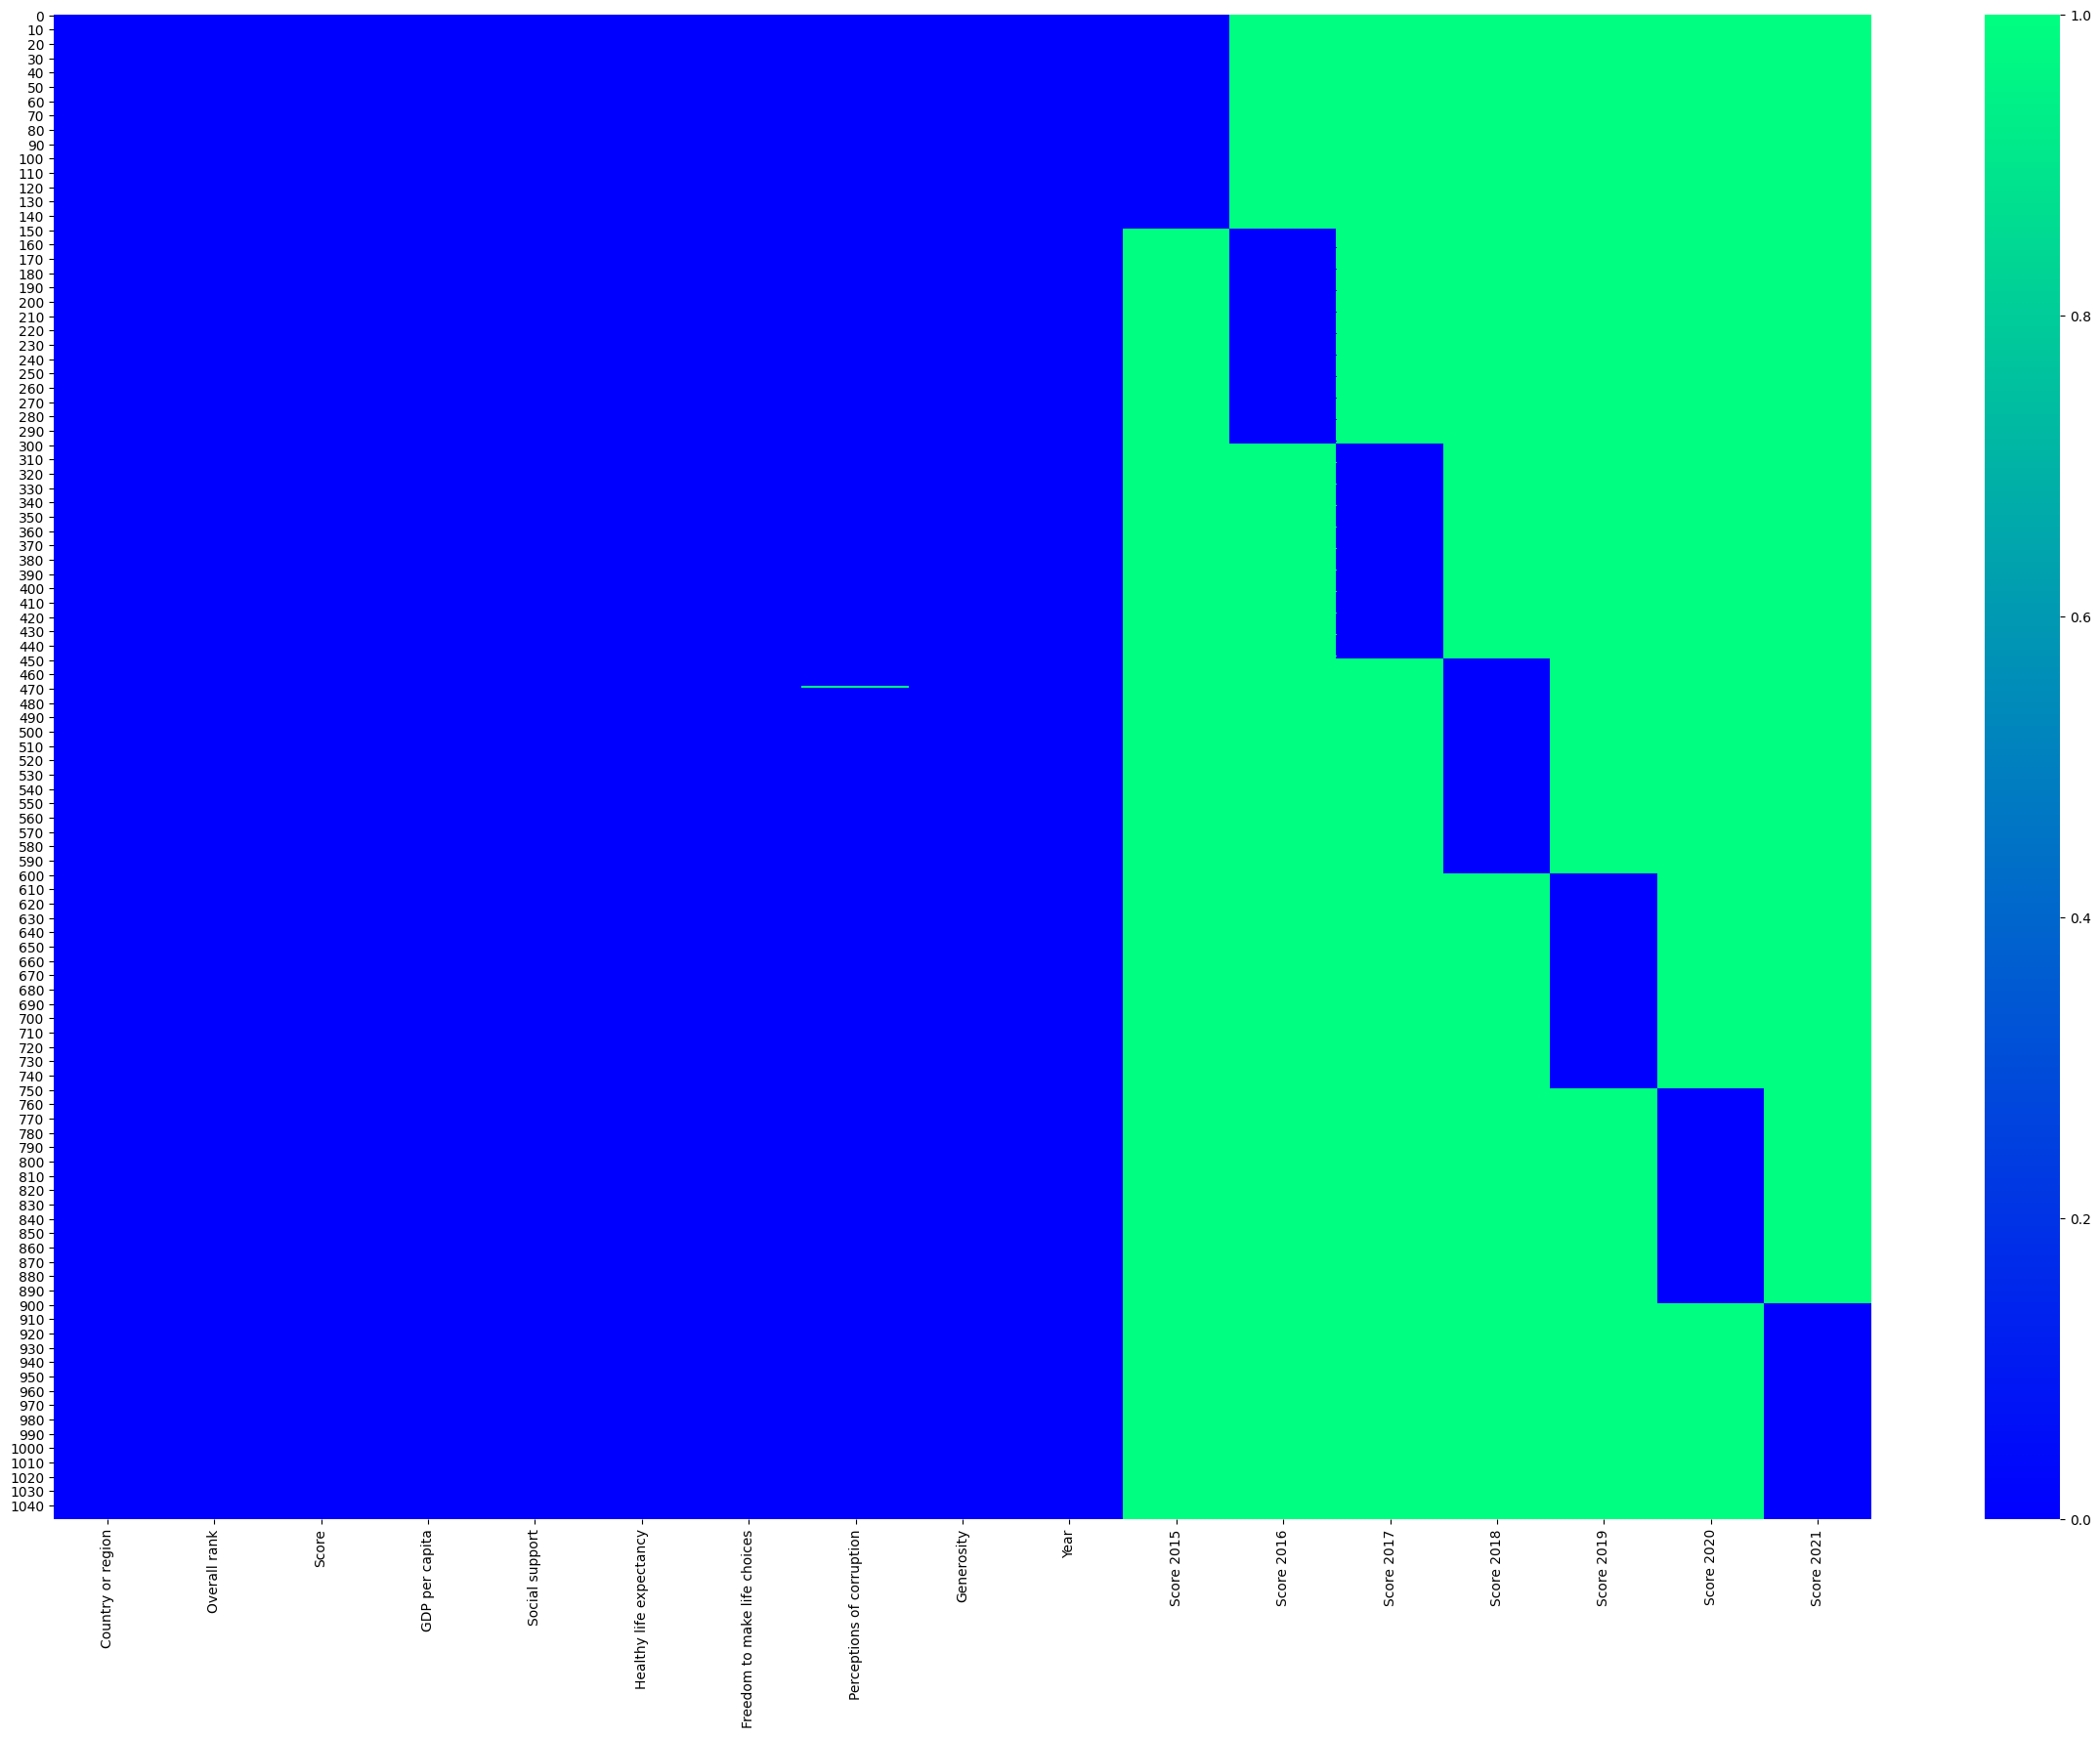

In [69]:
plt.figure( figsize = (30,20))
sns.heatmap(happy_data.isnull(), cmap ='winter')
plt.show()

In [70]:
for i in happy_data['Country or region']:
    happy_data['Score 2015']= happy_data['Score 2015'].fillna(0)
    happy_data['Score 2016'] = happy_data['Score 2016'].fillna(0)
    happy_data['Score 2017'] = happy_data['Score 2017'].fillna(0)
    happy_data['Score 2018'] = happy_data['Score 2018'].fillna(0)
    happy_data['Score 2019'] = happy_data['Score 2019'].fillna(0)
    happy_data['Score 2020'] = happy_data['Score 2020'].fillna(0)
    happy_data['Score 2021'] = happy_data['Score 2021'].fillna(0) 

null_find  = happy_data.loc[happy_data['Perceptions of corruption'].isnull()]
null_find

Country or region  Overall rank  Score  GDP per capita  \
469  United Arab Emirates            20  6.774           2.096   

     Social support  Healthy life expectancy  Freedom to make life choices  \
469           0.776                     0.67                         0.284   

     Perceptions of corruption  Generosity  Year  Score 2015  Score 2016  \
469                        NaN       0.186  2018         0.0         0.0   

     Score 2017  Score 2018  Score 2019  Score 2020  Score 2021  
469         0.0       6.774         0.0         0.0         0.0

In [71]:
happy_data.tail(20)

Country or region  Overall rank   Score  GDP per capita  \
1030                     Egypt           132  4.2830        0.954000   
1031                  Ethiopia           133  4.2750        0.370000   
1032                Mauritania           134  4.2270        0.666000   
1033                Madagascar           135  4.2080        0.266000   
1034                      Togo           136  4.1070        0.254000   
1035                    Zambia           137  4.0730        0.528000   
1036              Sierra Leone           138  3.8490        0.279000   
1037                     India           139  3.8190        0.741000   
1038                   Burundi           140  3.7750        0.000000   
1039                     Yemen           141  3.6580        0.329000   
1040                  Tanzania           142  3.6230        0.433000   
1041                     Haiti           143  3.6150        0.294000   
1042                    Malawi           144  3.6000        0.113000   
1043                   Lesotho           145  3.5120        0.451000   
1044  Central African Republic           149  3.4759        0.041072   
1045                  Botswana           146  3.4670        1.099000   
1046                    Rwanda           147  3.4150        0.364000   
1047                  Zimbabwe           148  3.1450        0.457000   
1048               South Sudan           152  2.8166        0.289083   
1049               Afghanistan           149  2.5230        0.370000   

      Social support  Healthy life expectancy  Freedom to make life choices  \
1030        0.647000                 0.426000                      0.446000   
1031        0.679000                 0.331000                      0.451000   
1032        0.749000                 0.273000                      0.218000   
1033        0.503000                 0.341000                      0.207000   
1034        0.239000                 0.203000                      0.289000   
1035        0.552000                 0.231000                      0.487000   
1036        0.377000                 0.100000                      0.408000   
1037        0.316000                 0.383000                      0.622000   
1038        0.062000                 0.155000                      0.298000   
1039        0.831000                 0.272000                      0.268000   
1040        0.540000                 0.300000                      0.549000   
1041        0.173000                 0.227000                      0.257000   
1042        0.168000                 0.298000                      0.484000   
1043        0.731000                 0.007000                      0.405000   
1044        0.000000                 0.000000                      0.292814   
1045        0.724000                 0.340000                      0.539000   
1046        0.202000                 0.407000                      0.627000   
1047        0.649000                 0.243000                      0.359000   
1048        0.553279                 0.208809                      0.065609   
1049        0.000000                 0.126000                      0.000000   

      Perceptions of corruption  Generosity  Year  Score 2015  Score 2016  \
1030                   0.092000    0.069000  2021         0.0         0.0   
1031                   0.114000    0.241000  2021         0.0         0.0   
1032                   0.133000    0.119000  2021         0.0         0.0   
1033                   0.087000    0.185000  2021         0.0         0.0   
1034                   0.107000    0.209000  2021         0.0         0.0   
1035                   0.074000    0.227000  2021         0.0         0.0   
1036                   0.047000    0.243000  2021         0.0         0.0   
1037                   0.106000    0.246000  2021         0.0         0.0   
1038                   0.212000    0.172000  2021         0.0         0.0   
1039                   0.089000    0.092000  2021         0.0         

In [72]:
happy_data['Perceptions of corruption']=happy_data['Perceptions of corruption'].fillna(0)

In [73]:
happy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             1050 non-null   object 
 1   Overall rank                  1050 non-null   int64  
 2   Score                         1050 non-null   float64
 3   GDP per capita                1050 non-null   float64
 4   Social support                1050 non-null   float64
 5   Healthy life expectancy       1050 non-null   float64
 6   Freedom to make life choices  1050 non-null   float64
 7   Perceptions of corruption     1050 non-null   float64
 8   Generosity                    1050 non-null   float64
 9   Year                          1050 non-null   int64  
 10  Score 2015                    1050 non-null   float64
 11  Score 2016                    1050 non-null   float64
 12  Score 2017                    1050 non-null   float64
 13  Sco

In [74]:
happy_data.describe()

Overall rank        Score  GDP per capita  Social support  \
count   1050.000000  1050.000000     1050.000000     1050.000000   
mean      77.638095     5.420954        0.918201        1.051271   
std       44.815398     1.121416        0.401493        0.335484   
min        1.000000     2.523000        0.000000        0.000000   
25%       39.000000     4.574000        0.605037        0.833055   
50%       77.000000     5.400000        0.985745        1.083463   
75%      116.000000     6.211375        1.241315        1.313592   
max      158.000000     7.842000        2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  \
count              1050.000000                   1050.000000   
mean                  0.614898                      0.431334   
std                   0.248205                      0.149432   
min                   0.000000                      0.000000   
25%                   0.439265                      0.332018   
50%                   0.646960                      0.447451   
75%                   0.801750                      0.550005   
max                   1.141000                      0.724000   

       Perceptions of corruption   Generosity         Year   Score 2015  \
count                1050.000000  1050.000000  1050.000000  1050.000000   
mean                    0.124694     0.206329  2018.000000     0.769466   
std                     0.106639     0.115454     2.000953     1.933798   
min                     0.000000     0.000000  2015.000000     0.000000   
25%                     0.053992     0.121700  2016.000000     0.000000   
50%                     0.090905     0.193692  2018.000000     0.000000   
75%                     0.155861     0.263000  2020.000000     0.000000   
max                     0.551910     0.838075  2021.000000     7.587000   

        Score 2016   Score 2017   Score 2018   Score 2019   Score 2020  \
count  1050.000000  1050.000000  1050.000000  1050.000000  1050.000000   
mean      0.767007     0.766491     0.770396     0.776374     0.783952   
std       1.928226     1.926062     1.934500     1.948262     1.966816   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       7.526000     7.537000     7.632000     7.769000     7.808700   

        Score 2021  
count  1050.000000  
mean      0.787268  
std       1.973850  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       7.842000

It is interesting that the mean happiness score steadily decreased between the years 2015 to 2019, from a mean of 7.27 to 7.18, then increased in 2020 to 7.26 and again in 2021 to 7.27, which is comparible to that of 2015. This implies that the average of the population experienced an increase in happiness (based on the six parameters) in 2020 - the year of covid and continues to experience a positive effect since. 

The minimum happiness score in 2021 is the lowest out of all 7 years, whilst the maximum happiness score in 2021 is the highest of the seven years. This implies that the contries who were higher ranked in the previous years have experienced a greater level of happiness since covid  whilst the countries at the lowest ranking of the happiness score have been greatly impacted further by covid, in a negative manner.

We will explore which parameters the highest ranked countried improved on, which has increased their scores as well as which parameters the lower ranked counties have decreased on, decreasing their scores. 

# EDA including Visualizations

Firstly, we will explore the correlations between the six parameters and the happiness score. 

In [75]:
data2 = happy_data.drop(['Overall rank', 'Year', 'Score 2015', 'Score 2016', 'Score 2017', 'Score 2018', 'Score 2019', 'Score 2020', 'Score 2021'], axis =1)
data2.corr()

Score  GDP per capita  Social support  \
Score                         1.000000        0.798869        0.637876   
GDP per capita                0.798869        1.000000        0.586036   
Social support                0.637876        0.586036        1.000000   
Healthy life expectancy       0.741793        0.781963        0.636719   
Freedom to make life choices  0.549895        0.371329        0.362834   
Perceptions of corruption     0.411615        0.324375        0.150458   
Generosity                    0.114168       -0.041727       -0.002119   

                              Healthy life expectancy  \
Score                                        0.741793   
GDP per capita                               0.781963   
Social support                               0.636719   
Healthy life expectancy                      1.000000   
Freedom to make life choices                 0.338600   
Perceptions of corruption                    0.292658   
Generosity                                  -0.014083   

                              Freedom to make life choices  \
Score                                             0.549895   
GDP per capita                                    0.371329   
Social support                                    0.362834   
Healthy life expectancy                           0.338600   
Freedom to make life choices                      1.000000   
Perceptions of corruption                         0.445825   
Generosity                                        0.246758   

                              Perceptions of corruption  Generosity  
Score                                          0.411615    0.114168  
GDP per capita                                 0.324375   -0.041727  
Social support                                 0.150458   -0.002119  
Healthy life expectancy                        0.292658   -0.014083  
Freedom to make life choices                   0.445825    0.246758  
Perceptions of corruption                      1.000000    0.269763  
Generosity                                     0.269763    1.000000

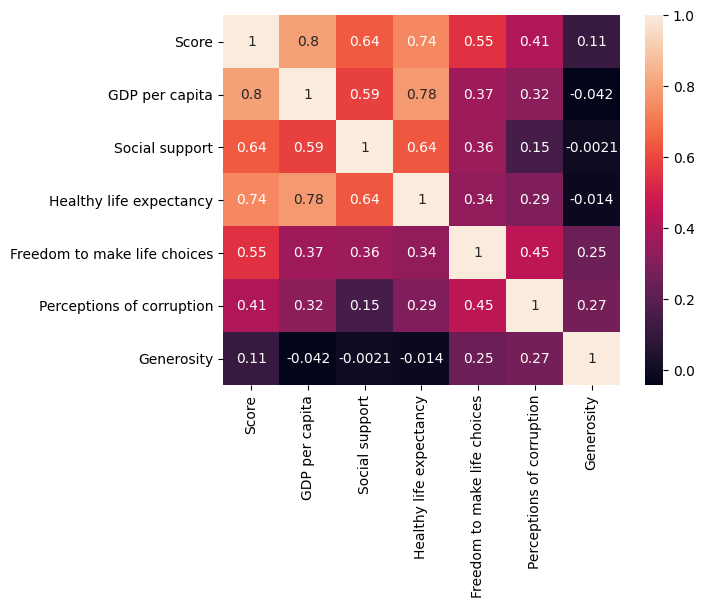

In [76]:
sns.heatmap(data2.corr(), annot = True)
plt.rcParams['figure.figsize'] = [500,200]
plt.show()

From the correlation above it is evident that the highest correlation to the overall Hapiness Score is the GDP per Capita contribution followed closely by Social Support and Healthy life expectancy. The parameters of Perception of corruption and Freedom to make life choices have little relation to the final Happiness score and the parameter of Generosity has no relation. In order to explore this more we will plot the relations of the 6 parameters with the Happiness score.

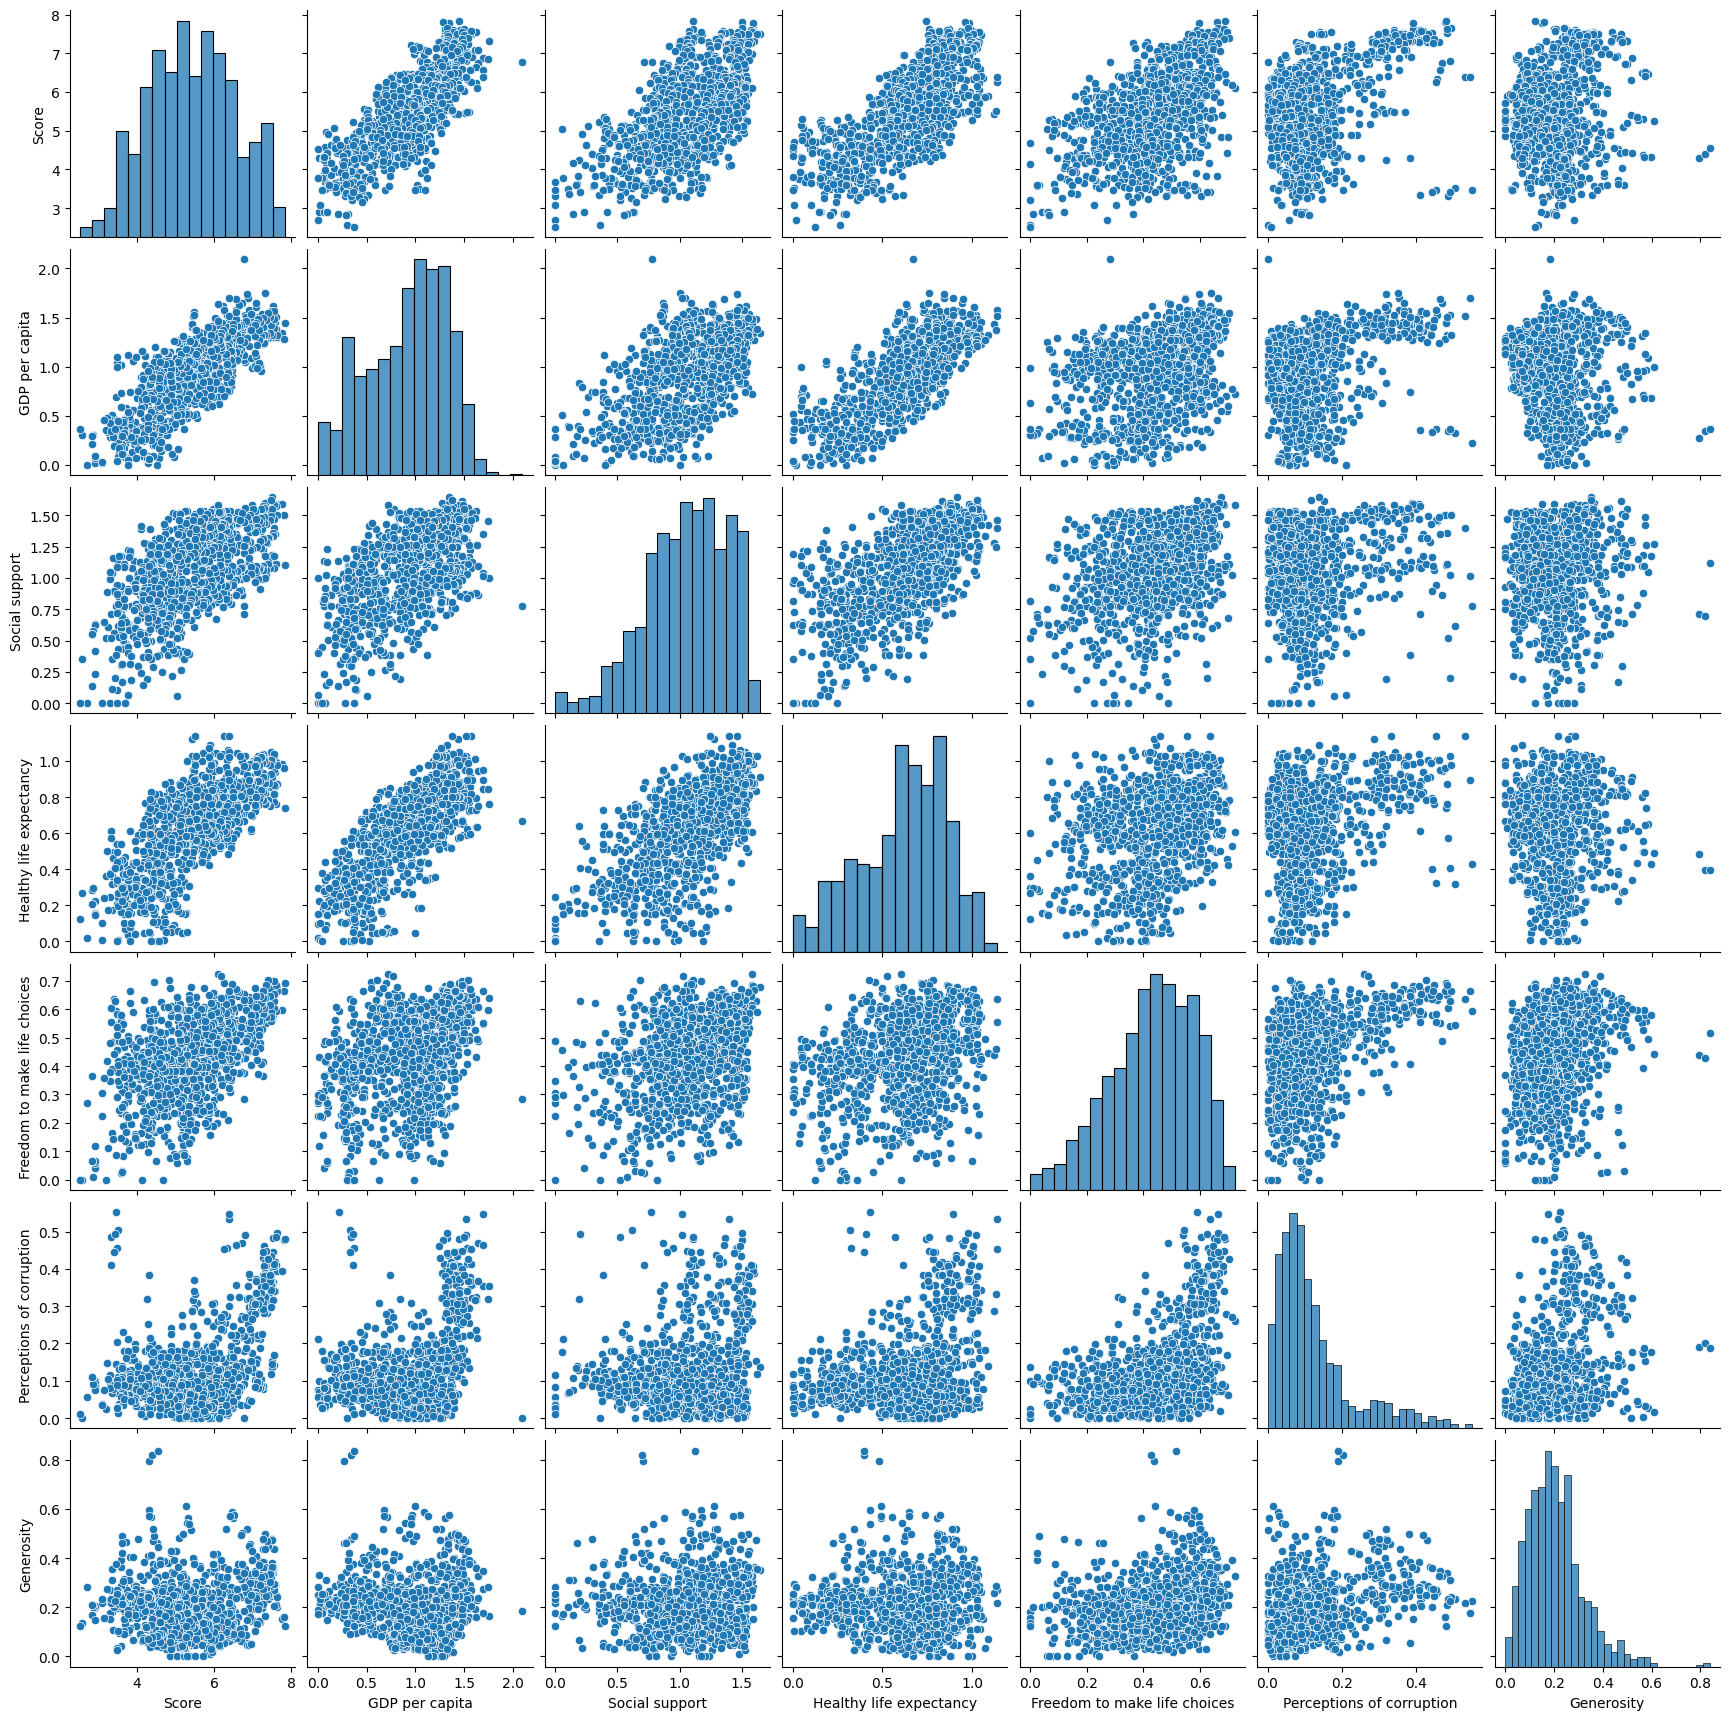

In [77]:
sns.pairplot(data2)

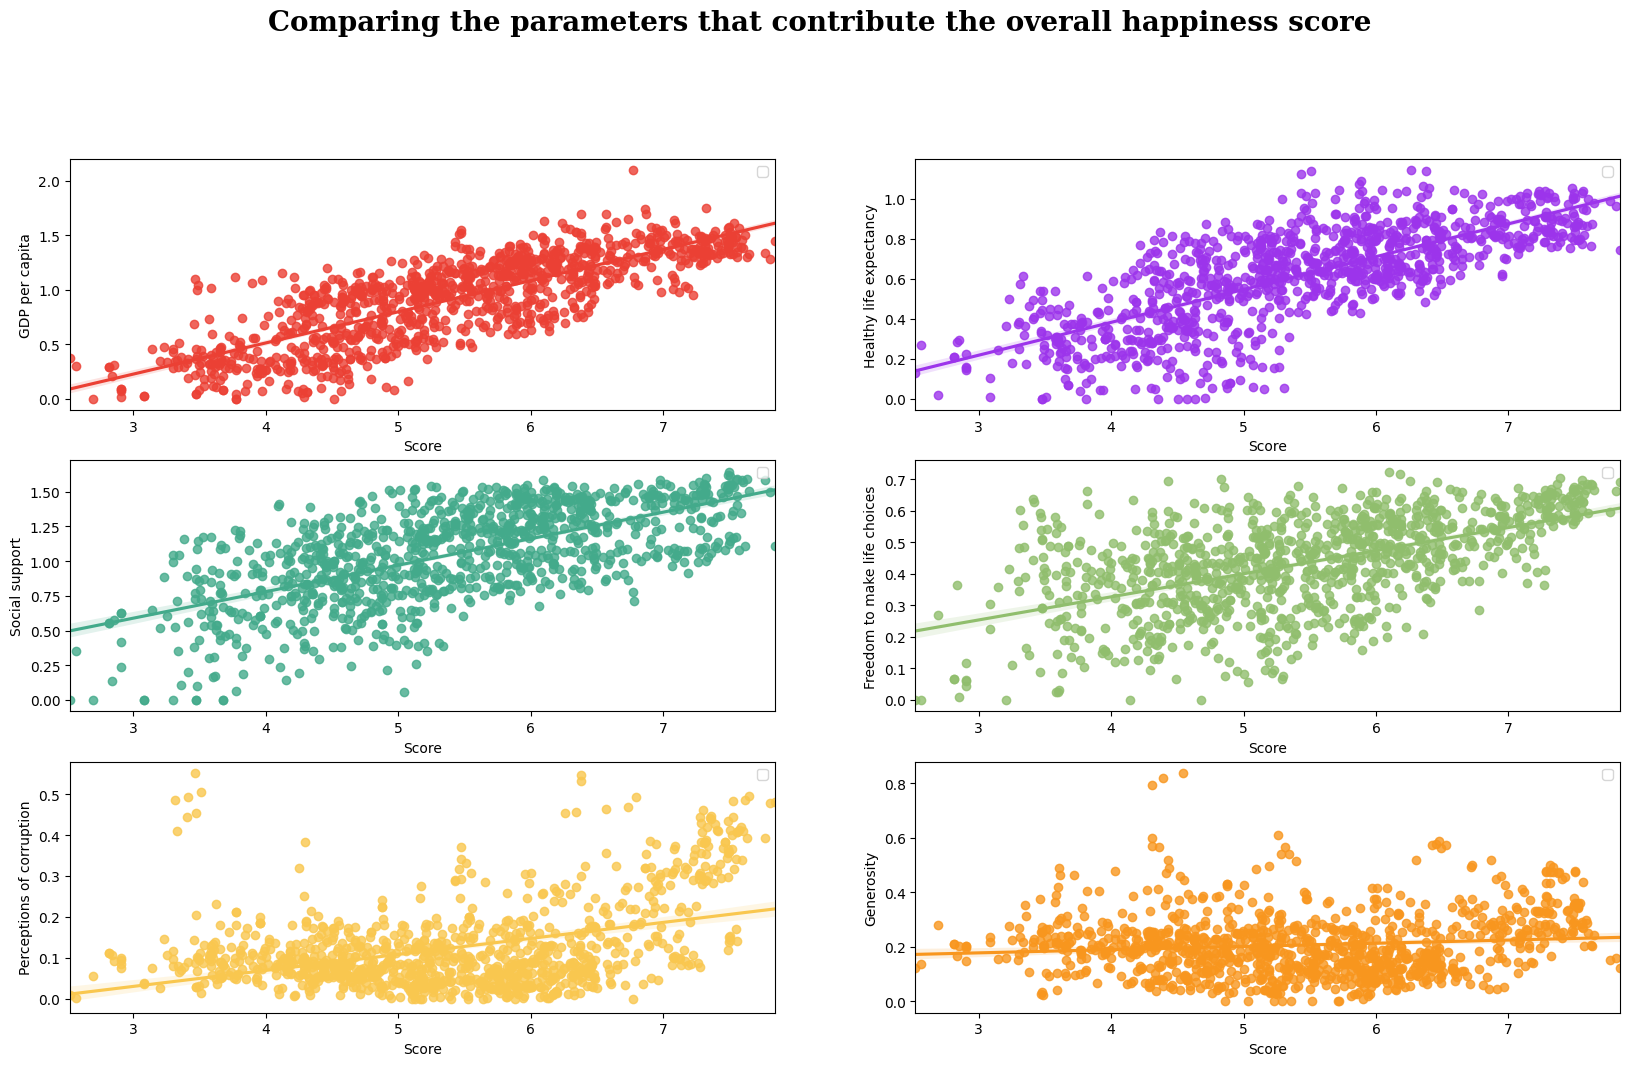

In [78]:
cols=data2.corr()['Score'].sort_values(ascending=False)
color=["#eb4034","#3480eb","#f8961e","#f9c74f","#90be6d","#43aa8b","#9c34eb"]
fig=plt.figure(figsize=(20,15))
plt.suptitle("Comparing the parameters that contribute the overall happiness score", family='Serif', weight='bold', size=20)
counts=0
for i in cols.index[1:]:
    
    corr_comp=plt.subplot(421+counts)
    corr_comp=sns.regplot(data= data2, x='Score',y=i, color=color[-counts])
    corr_comp.legend('')
    counts=counts+1
    
plt.legend('')

As a confirmation of that represented in the heatmap, the most impactful relation to the happiness score is the GDP per Capita contribution followed closely by Social Support and Healthy life expectancy. The parameter of Generosity has no relation to the score with a large wideset, variable dataset represented.We will explore the distribution of each of these parameters. 

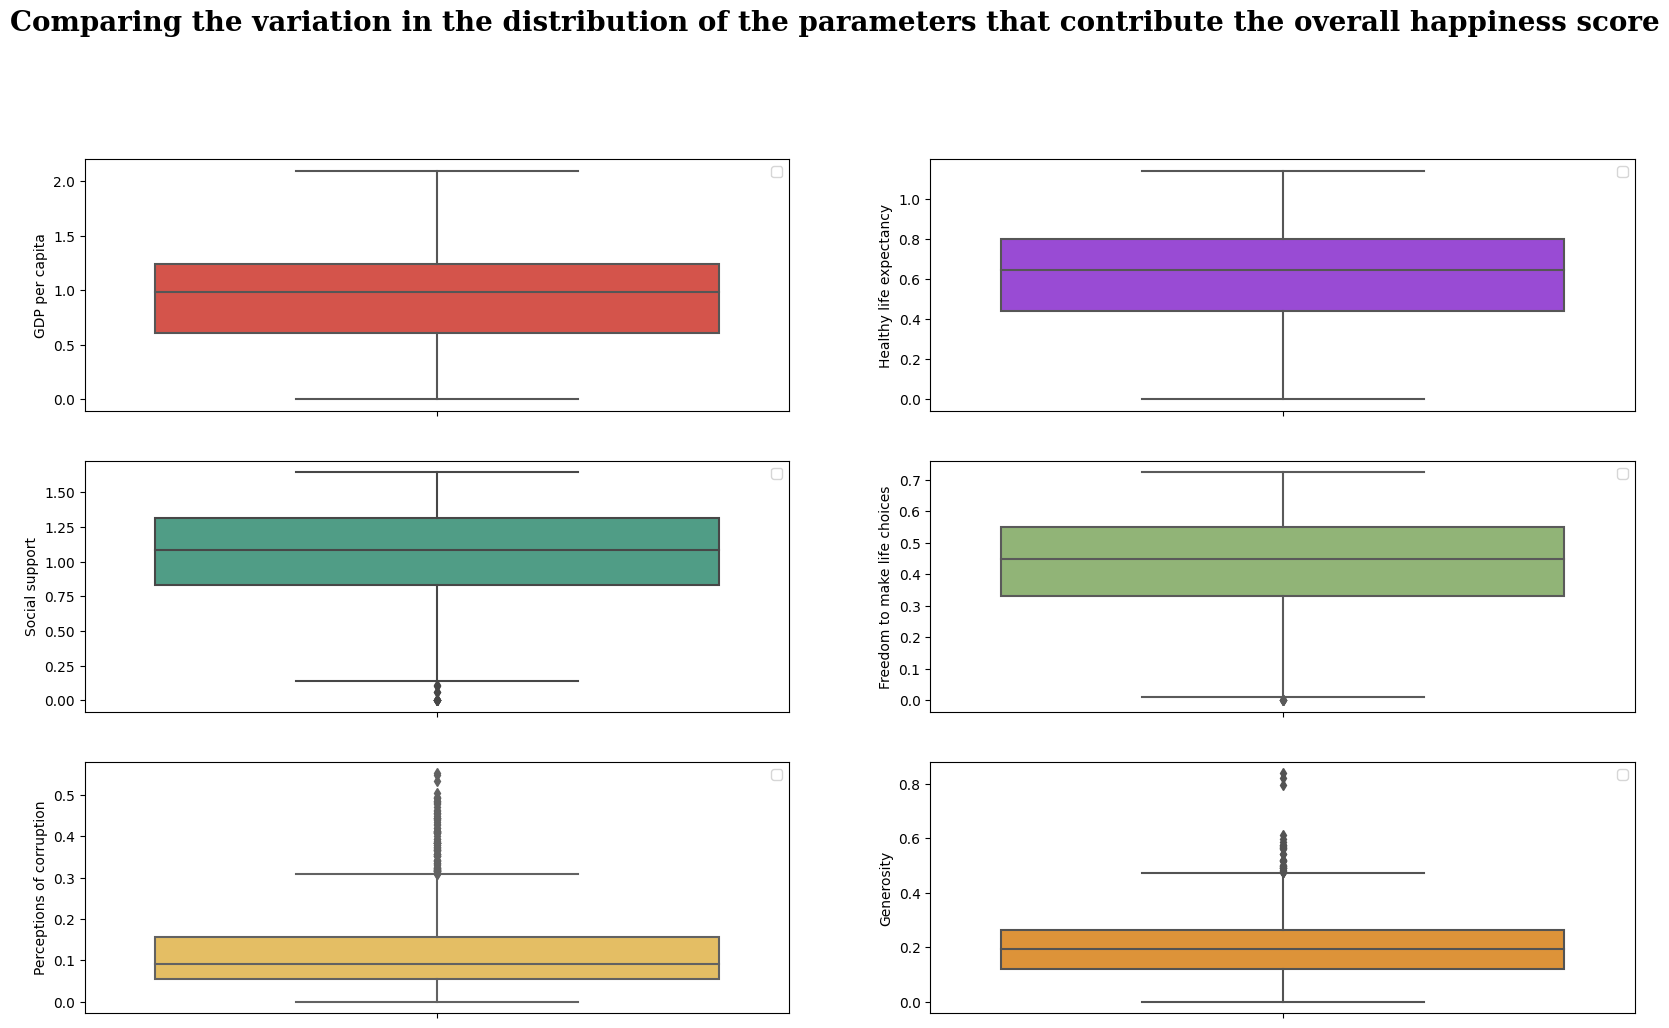

In [79]:
cols=data2.corr()['Score'].sort_values(ascending=False)
color=["#eb4034","#3480eb","#f8961e","#f9c74f","#90be6d","#43aa8b","#9c34eb"]
fig=plt.figure(figsize=(20,15))
plt.suptitle("Comparing the variation in the distribution of the parameters that contribute the overall happiness score", family='Serif', weight='bold', size=20)
counts=0
for i in cols.index[1:]:
    
    corr_comp=plt.subplot(421+counts)
    corr_comp=sns.boxplot(data= data2,y=i, color=color[-counts])
    corr_comp.legend('')
    counts=counts+1
    
plt.legend('')

As expected with the large variation in data represented in the scatter plot correlations, the Perceptions of Corruption and Generosity have a large number of outliers, specifically towards the higher score , we will explore these outliers. Looking at the score distributions for each parameter throughout the years;

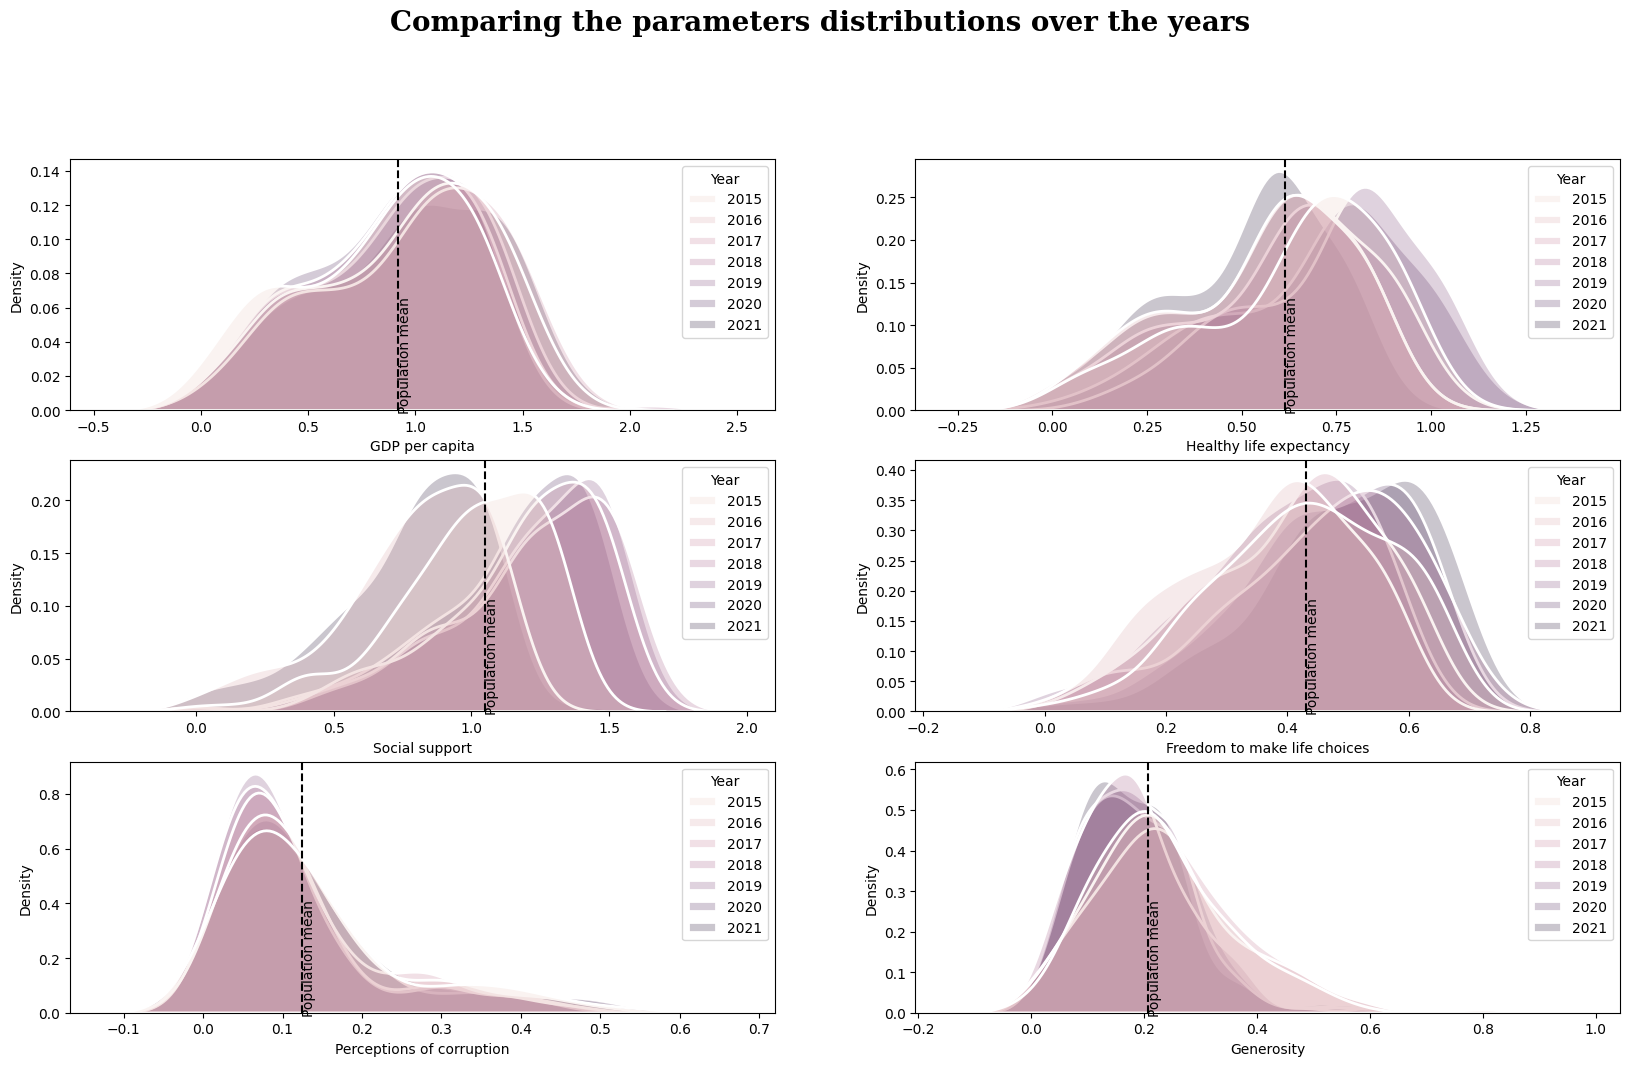

In [80]:
fig=plt.figure(figsize=(20,15))
plt.suptitle("Comparing the parameters distributions over the years", family='Serif', weight='bold', size=20)
counter=0
for i in cols.index[1:]:
    parameter_comp=plt.subplot(421+counter)
    sns.kdeplot(happy_data[i], fill=True,hue=happy_data['Year'], linewidth=2, edgecolor='white', multiple='layer')
    plt.axvline(happy_data[i].mean(), c='black',ls='--')
    plt.text(x=happy_data[i].mean(),y=0.00,s='Population mean', size=10, rotation = 90)
   
    counter=counter+1

The greatest difference in distributions for each of the parameters between the 7 years is the social support. The year 2015 and 2021 are more comparable than any of the other years, which is purely due to the impact of covid which isolated people from all scoial connection including work.

Generosity has reduced over the 7 year period whilst the Freedom to make life choices has increased. Perceptions of Corruption has decreased in score and in variation implying that more countries are experiencing higher levels of corruption.

There is a large shift in healthy life expectency distributions between 2020 and 2021, likely due to the impact of of covid.

Interestingly, the parameter of GPD per Capita is the only distribution that has remained comparable throughout the period This was unusal as we know the global GPD shrunk due to a loss of jobs, increase in vacancies and a loss of tourism, however the distribution of the welath of the countries remained, infact the scores shifted slightly higher as the wealthier countries economy improved due to the right strategy and infrastructure employed by the government in support. As GPD per Capita and Happiness Score have a very high correlation, this is the main reason for the increase in the mean of the Happiness Score in 2020 and 2021. 

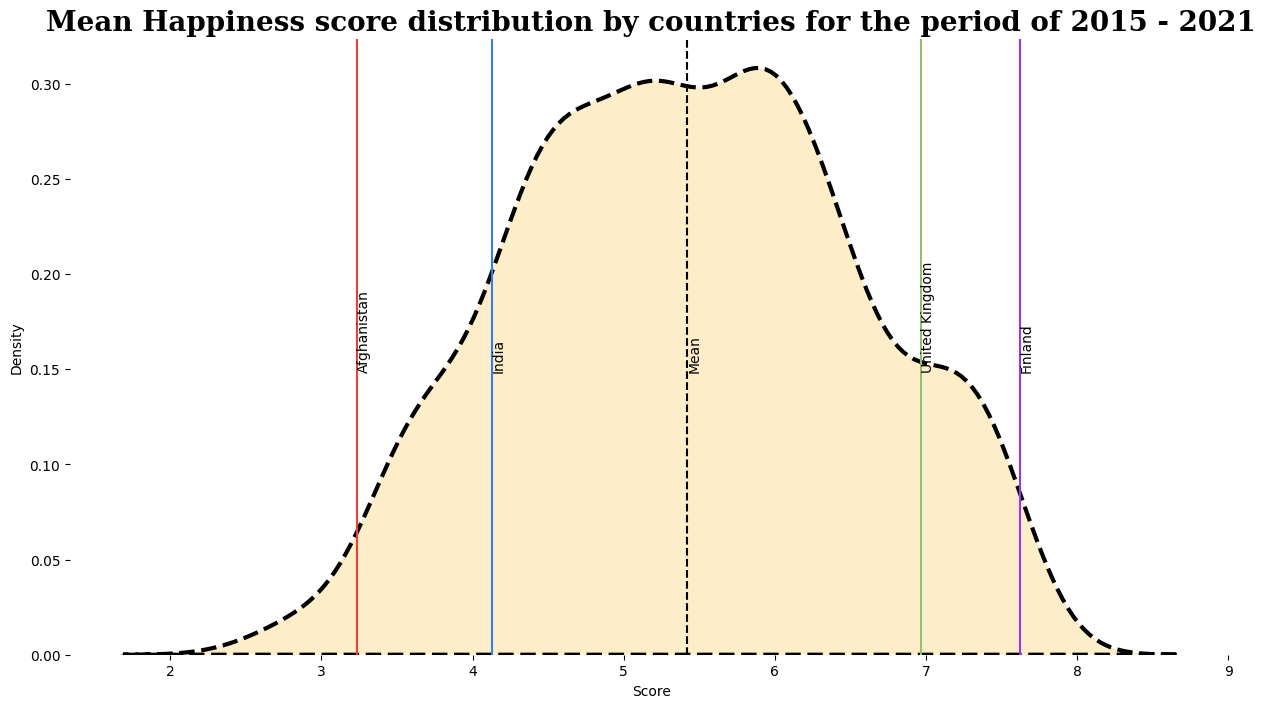

In [81]:
fig=plt.figure(figsize=(15,8))
plt.title("Mean Happiness score distribution by countries for the period of 2015 - 2021",family='Serif', weight='bold', size=20)
sns.kdeplot(data2['Score'], fill=True,color=color[3], shade=True, edgecolor='black', linewidth=3, ls='--', alpha=0.3)
plt.axvline(data2['Score'].mean(), c='black',ls='--')
plt.text(data2['Score'].mean(), y=0.15, s='Mean', rotation=90)
plt.axvline(data2[data2['Country or region']=='Finland']['Score'].mean(), c=color[-1])
plt.text(x=data2[data2['Country or region']=='Finland']['Score'].mean(), y=0.15, s='Finland', rotation=90)
plt.axvline(data2[data2['Country or region']=='Afghanistan']['Score'].mean(), c=color[0])
plt.text(x=data2[data2['Country or region']=='Afghanistan']['Score'].mean(), y=0.15, s='Afghanistan', rotation=90)
plt.axvline(data2[data2['Country or region']=='India']['Score'].mean(), c=color[1])
plt.text(x=data2[data2['Country or region']=='India']['Score'].mean(), y=0.15, s='India', rotation=90)
plt.axvline(data2[data2['Country or region']=='United Kingdom']['Score'].mean(), c=color[4])
plt.text(x=data2[data2['Country or region']=='United Kingdom']['Score'].mean(), y=0.15, s='United Kingdom', rotation=90)
for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)

Evidently, with the multiple peaks and unsymetrical distribution, the data set is not a normal distrubtion. In confirmation, we will plot the normal distrubtion of a data set with the same mean and standard deviation.

<AxesSubplot:>

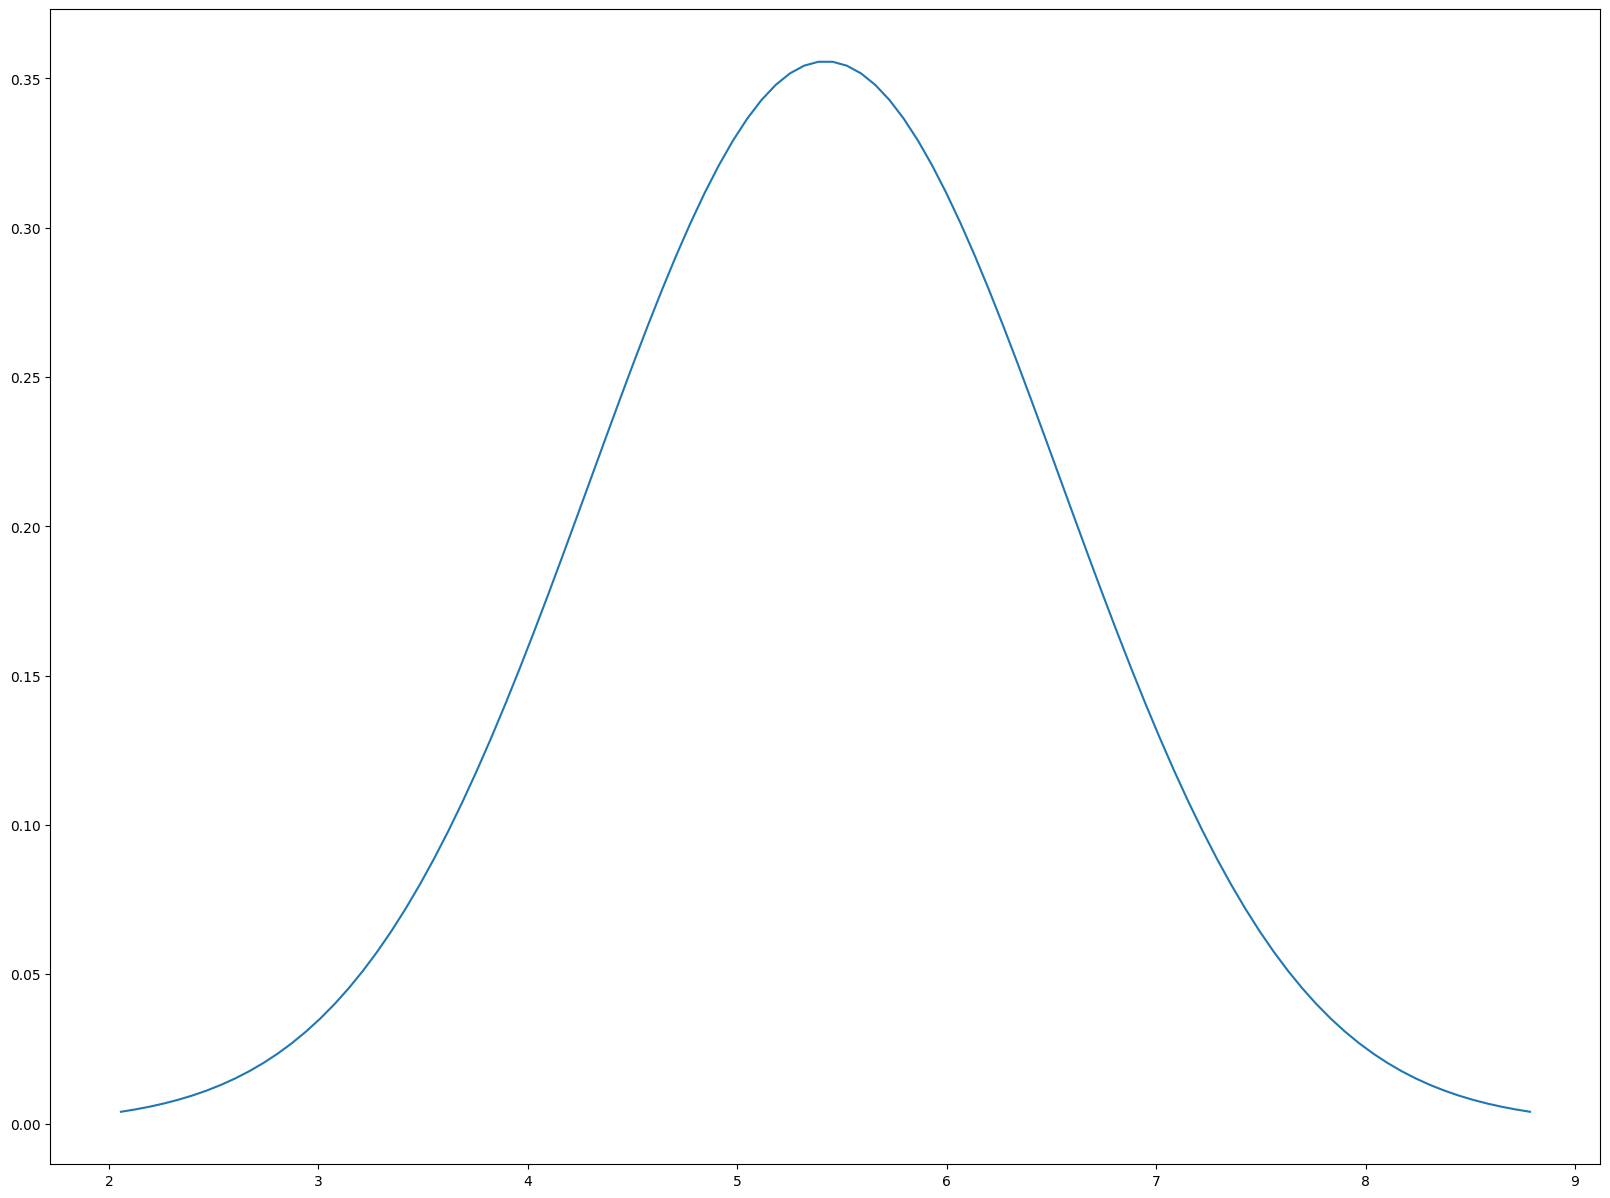

In [82]:
import numpy as np
from scipy import stats
# Define the parameters of the distribution

mu =  data2.Score.mean()
sigma =  data2.Score.std()


# Plot the normal curve for the above parameters. linspace()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y =stats.norm.pdf(x, mu, sigma)
fig=plt.figure(figsize=(20,15))
sns.lineplot(x, y)


In confirmation, the average of the happiness scores distributed by country is not a normal distribution. We will explore if any of the years data distributed by the countries was normally distributed.

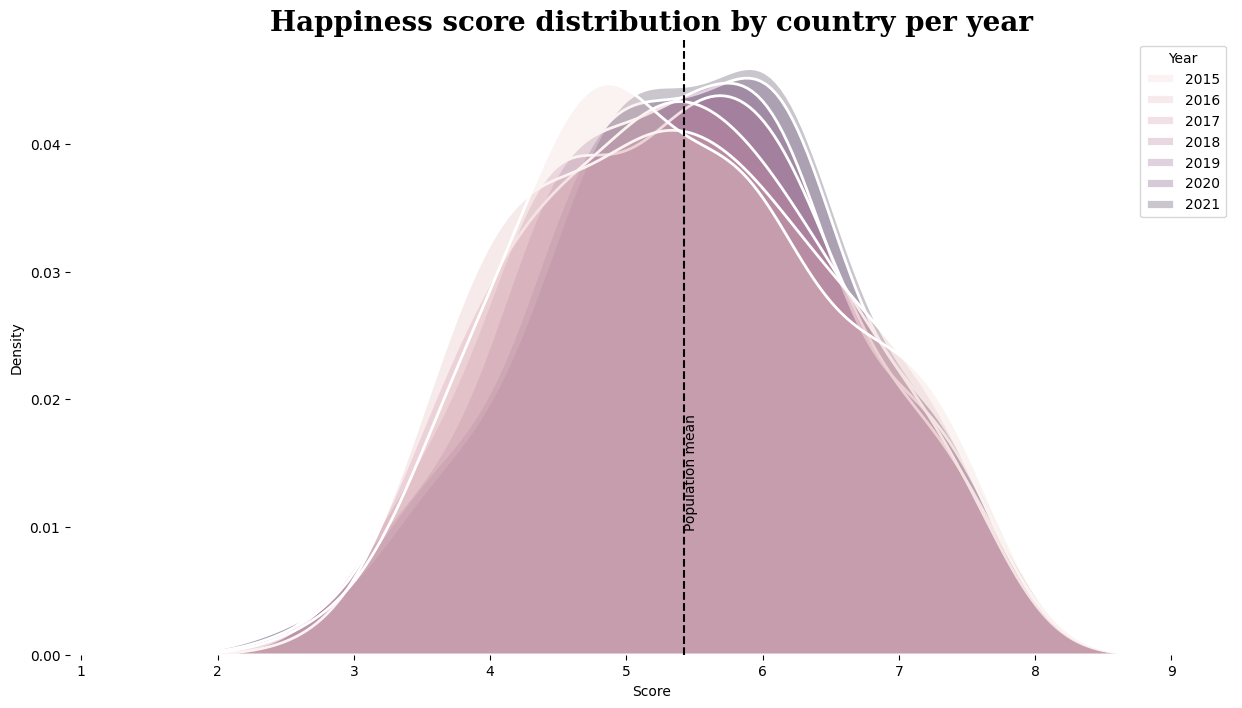

In [83]:
fig=plt.figure(figsize=(15,8))
plt.title("Happiness score distribution by country per year",family='Serif', weight='bold', size=20)
sns.kdeplot(happy_data['Score'], fill=True,hue=happy_data['Year'], shade=True, linewidth=2, edgecolor='white', multiple='layer')
plt.axvline(happy_data['Score'].mean(), c='black',ls='--')
plt.text(x=happy_data['Score'].mean(),y=0.01,s='Population mean', size=10, rotation = 90)
for s in ['left','right','top','bottom']:
    plt.gca().spines[s].set_visible(False)

The happiness score distribution by country has not been normally distributed in any of the 7 years assessed. The variation in the data decreases between 2015 to 2021. The density of more higher scores is the highest in 2020 and 2021 , supporting that covid has improved the happiness level of more countries.

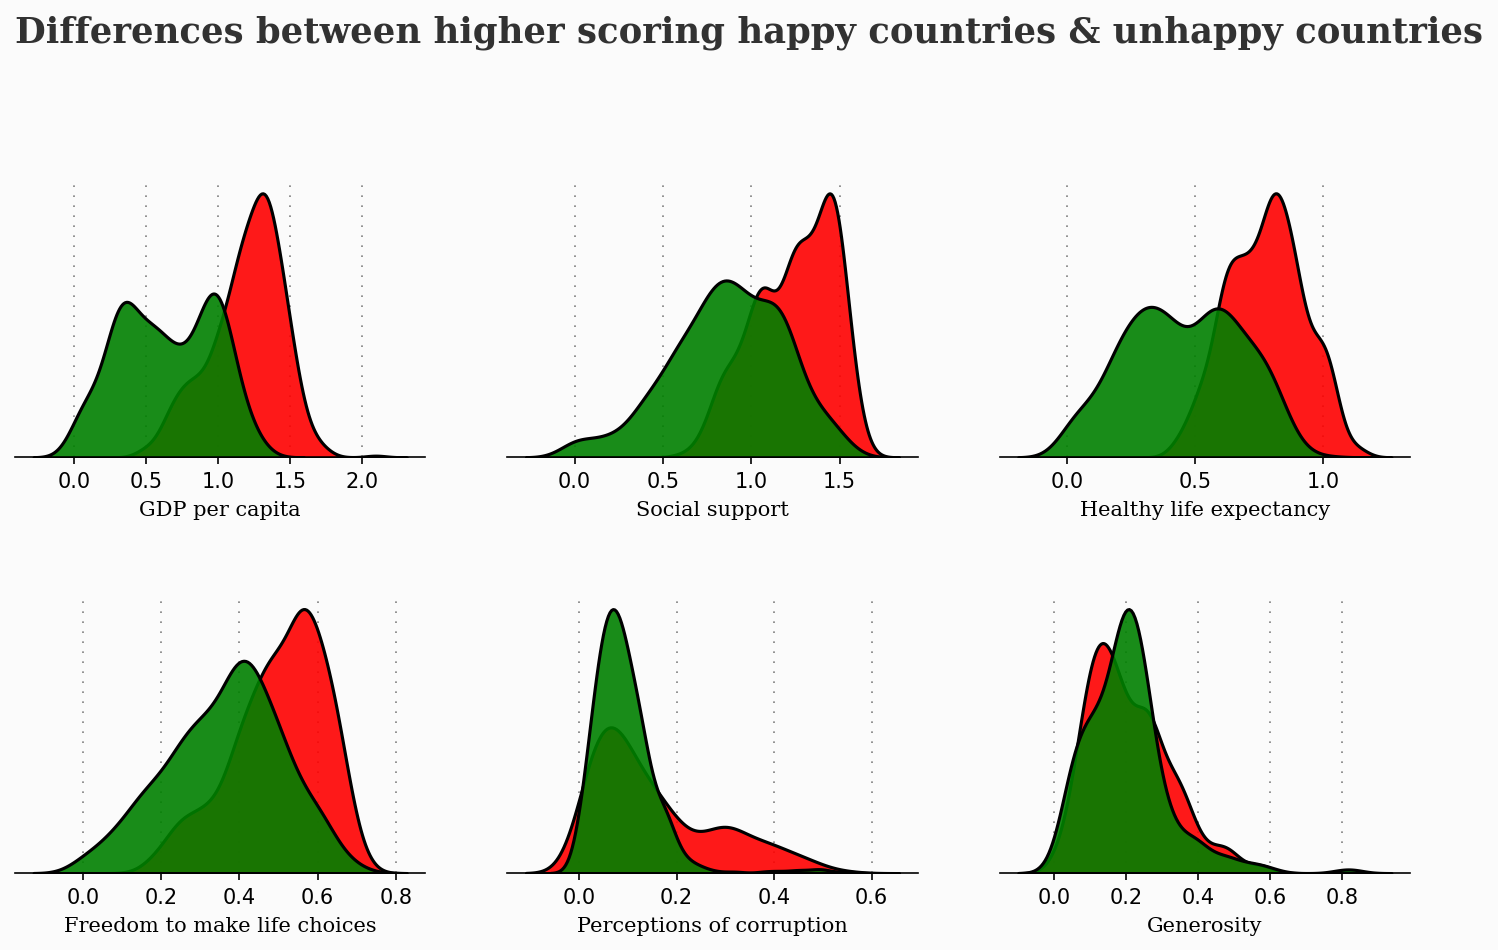

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

happiness_mean = data2['Score'].mean()
happiness_data = data2.copy()
happiness_data['score_category'] = happiness_data['Score'].apply(lambda x: 0 if x < happiness_mean else 1)
happiness_data.drop(['Score'], axis =1, inplace = True)


background_color = '#fbfbfb'
fig = plt.figure(figsize=(12, 6), dpi=150, facecolor=background_color)
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.2, hspace=0.5)

axes = []
for row in range(0, 2):
    for col in range(0, 3):
        ax = fig.add_subplot(gs[row, col])
        ax.set_facecolor(background_color)
        ax.tick_params(axis='y', left=False)
        ax.get_yaxis().set_visible(False)
        ax.set_axisbelow(True)
        for s in ["top", "right", "left"]:
            ax.spines[s].set_visible(False)
        axes.append(ax)

high_happy_score = happiness_data[happiness_data['score_category'] == 1]
low_happy_score = happiness_data[happiness_data['score_category'] == 0]
continuous = [var for var in happiness_data.columns if happiness_data[var].dtype != 'O']

plot = 0
for variable in continuous:
    if plot < 6:  # Ensure that the number of continuous variables does not exceed the number of subplots
        sns.kdeplot(high_happy_score[variable], ax=axes[plot], color='red', ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(low_happy_score[variable], ax=axes[plot], color='green', shade=True, ec='black', linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        axes[plot].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1, 5))
        axes[plot].set_xlabel(variable, fontfamily='serif')
        plot += 1

Xstart, Xend = axes[0].get_xlim()
Ystart, Yend = axes[0].get_ylim()

axes[0].text(Xstart, Yend + (Yend * 0.5), 'Differences between higher scoring happy countries & unhappy countries', fontsize=17, fontweight='bold', fontfamily='serif', color='#323232')
plt.show()

There are large differences between the two groupings, higher scored happy countries and the lower scored countries, specifically with GDP per Capita, Social Support and Healthy life expectancy. The ditribution of these higher scoring countries within these three parameters is comparable to the mean score distribution of the counties. The twin peaks of these distributions is of particular interest. 

These three parameters too indicated the highest correlation with the overall happiness score, consequently it is clear that the parameters of GPD per capita, scoial support and healthy life expectancy are the most important factors in consideration of the happiness score. 

The perceptions of corruption between the two groupings peaks in density at the same point however, there is less variation in the distribution of the lower ranked countries towards the lower scorings whilst the higher scoring countries indicated a high level of variation. Perhaps more interesting though, the lower scoring countries appear to be more generous.



In [85]:
# import graph objects as "go"
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot

df1_20 = df1.iloc[:20,:]
df2_20 = df2.iloc[:20,:]
df3_20 = df3.iloc[:20,:]
df4_20 = df4.iloc[:20,:]
df5_20 = df5.iloc[:20,:]
df6_20 = df6.iloc[:20,:]
df7_20 = df7.iloc[:20,:]

background_color = '#fbfbfb'

# creating trace1
trace1 =go.Scatter(
                    x = df1_20['Country or region'],
                    y = df1_20['Score'],
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'red'),
                    #line = dict(color='firebrick', width=4, dash='dot'),
                    text= df1_20['Country or region'])
# creating trace2
trace2 =go.Scatter(
                    x = df1_20['Country or region'],
                    y = df2_20['Score'],
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'green'),
                    text= df2_20['Country or region'])
# creating trace3
trace3 =go.Scatter(
                    x = df1_20['Country or region'],
                    y = df3_20['Score'],
                    mode = "markers",
                    name = "2017",
                    marker = dict(color = 'blue'),
                    text= df3_20['Country or region'])

# creating trace4
trace4 =go.Scatter(
                    x = df1_20['Country or region'],
                    y = df4_20['Score'],
                    mode = "markers",
                    name = "2018",
                    marker = dict(color = 'black'),
                    text= df4_20['Country or region'])

# creating trace5
trace5 =go.Scatter(
                    x = df1_20['Country or region'],
                    y = df5_20['Score'],
                    mode = "markers",
                    name = "2019",
                    marker = dict(color = 'pink'),
                    text= df5_20['Country or region'])
# creating trace6
trace6 =go.Scatter(
                    x = df1_20['Country or region'],
                    y = df6_20['Score'],
                    mode = "markers",
                    name = "2020",
                    marker = dict(color = color[-2]),
                    text= df6_20['Country or region'])
# creating trace7
trace7 =go.Scatter(
                    x = df1_20['Country or region'],
                    y = df7_20['Score'],
                    mode = "markers",
                    name = "2021",
                    marker = dict(color = color[-1]),
                    text= df7_20['Country or region'])

dataset = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = dict(title = 'Change in Happiness Score between the years of 2015 to 2021 for the Top 20 Happiest Countries',
              xaxis= dict(title= 'Country or region',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Score',ticklen= 5,zeroline= False),
              hovermode="x unified", plot_bgcolor = background_color
             )

fig = dict(data = dataset, layout = layout)

iplot(fig)

It is interesting that the highest happiness score has had the greatest change in the first overall ranked country reaching the highest score in 2021. 

In [86]:
df1_b20 = df1.iloc[-20:,:]
df2_b20 = df2.iloc[-20:,:]
df3_b20 = df3.iloc[-20:,:]
df4_b20 = df4.iloc[-20:,:]
df5_b20 = df5.iloc[-20:,:]
df6_b20 = df6.iloc[-20:,:]
df7_b20 = df7.iloc[-20:,:]

background_color = '#fbfbfb'

# creating trace1
trace1 =go.Scatter(
                    x = df1_b20['Country or region'],
                    y = df1_b20['Score'],
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'red'),
                    #line = dict(color='firebrick', width=4, dash='dot'),
                    text= df1_b20['Country or region'])
# creating trace2
trace2 =go.Scatter(
                    x = df1_b20['Country or region'],
                    y = df2_b20['Score'],
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'green'),
                    text= df2_b20['Country or region'])
# creating trace3
trace3 =go.Scatter(
                    x = df1_b20['Country or region'],
                    y = df3_b20['Score'],
                    mode = "markers",
                    name = "2017",
                    marker = dict(color = 'blue'),
                    text= df3_b20['Country or region'])

# creating trace4
trace4 =go.Scatter(
                    x = df1_b20['Country or region'],
                    y = df4_b20['Score'],
                    mode = "markers",
                    name = "2018",
                    marker = dict(color = 'black'),
                    text= df4_b20['Country or region'])

# creating trace5
trace5 =go.Scatter(
                    x = df1_b20['Country or region'],
                    y = df5_b20['Score'],
                    mode = "markers",
                    name = "2019",
                    marker = dict(color = 'pink'),
                    text= df5_b20['Country or region'])
# creating trace6
trace6 =go.Scatter(
                    x = df1_b20['Country or region'],
                    y = df6_b20['Score'],
                    mode = "markers",
                    name = "2020",
                    marker = dict(color = color[-2]),
                    text= df6_20['Country or region'])
# creating trace7
trace7 =go.Scatter(
                    x = df1_b20['Country or region'],
                    y = df7_b20['Score'],
                    mode = "markers",
                    name = "2021",
                    marker = dict(color = color[-1]),
                    text= df7_b20['Country or region'])
dataset = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = dict(title = 'Change in Happiness Score between the years of 2015 to 2021 for the Top 20 Unhappiest Countries',
              xaxis= dict(title= 'Country or region',ticklen=10,zeroline= False),
              yaxis= dict(title= 'Score',ticklen= 5,zeroline= False),
              hovermode="x unified", plot_bgcolor = background_color
             )

fig = dict(data = dataset, layout = layout)
iplot(fig)

Contradictory to the highest ranked scoring countries where the happiness score for 2021 was the highest, the year 2021 happiness score for the unhappiest countries is the lowest score over the 7 years.

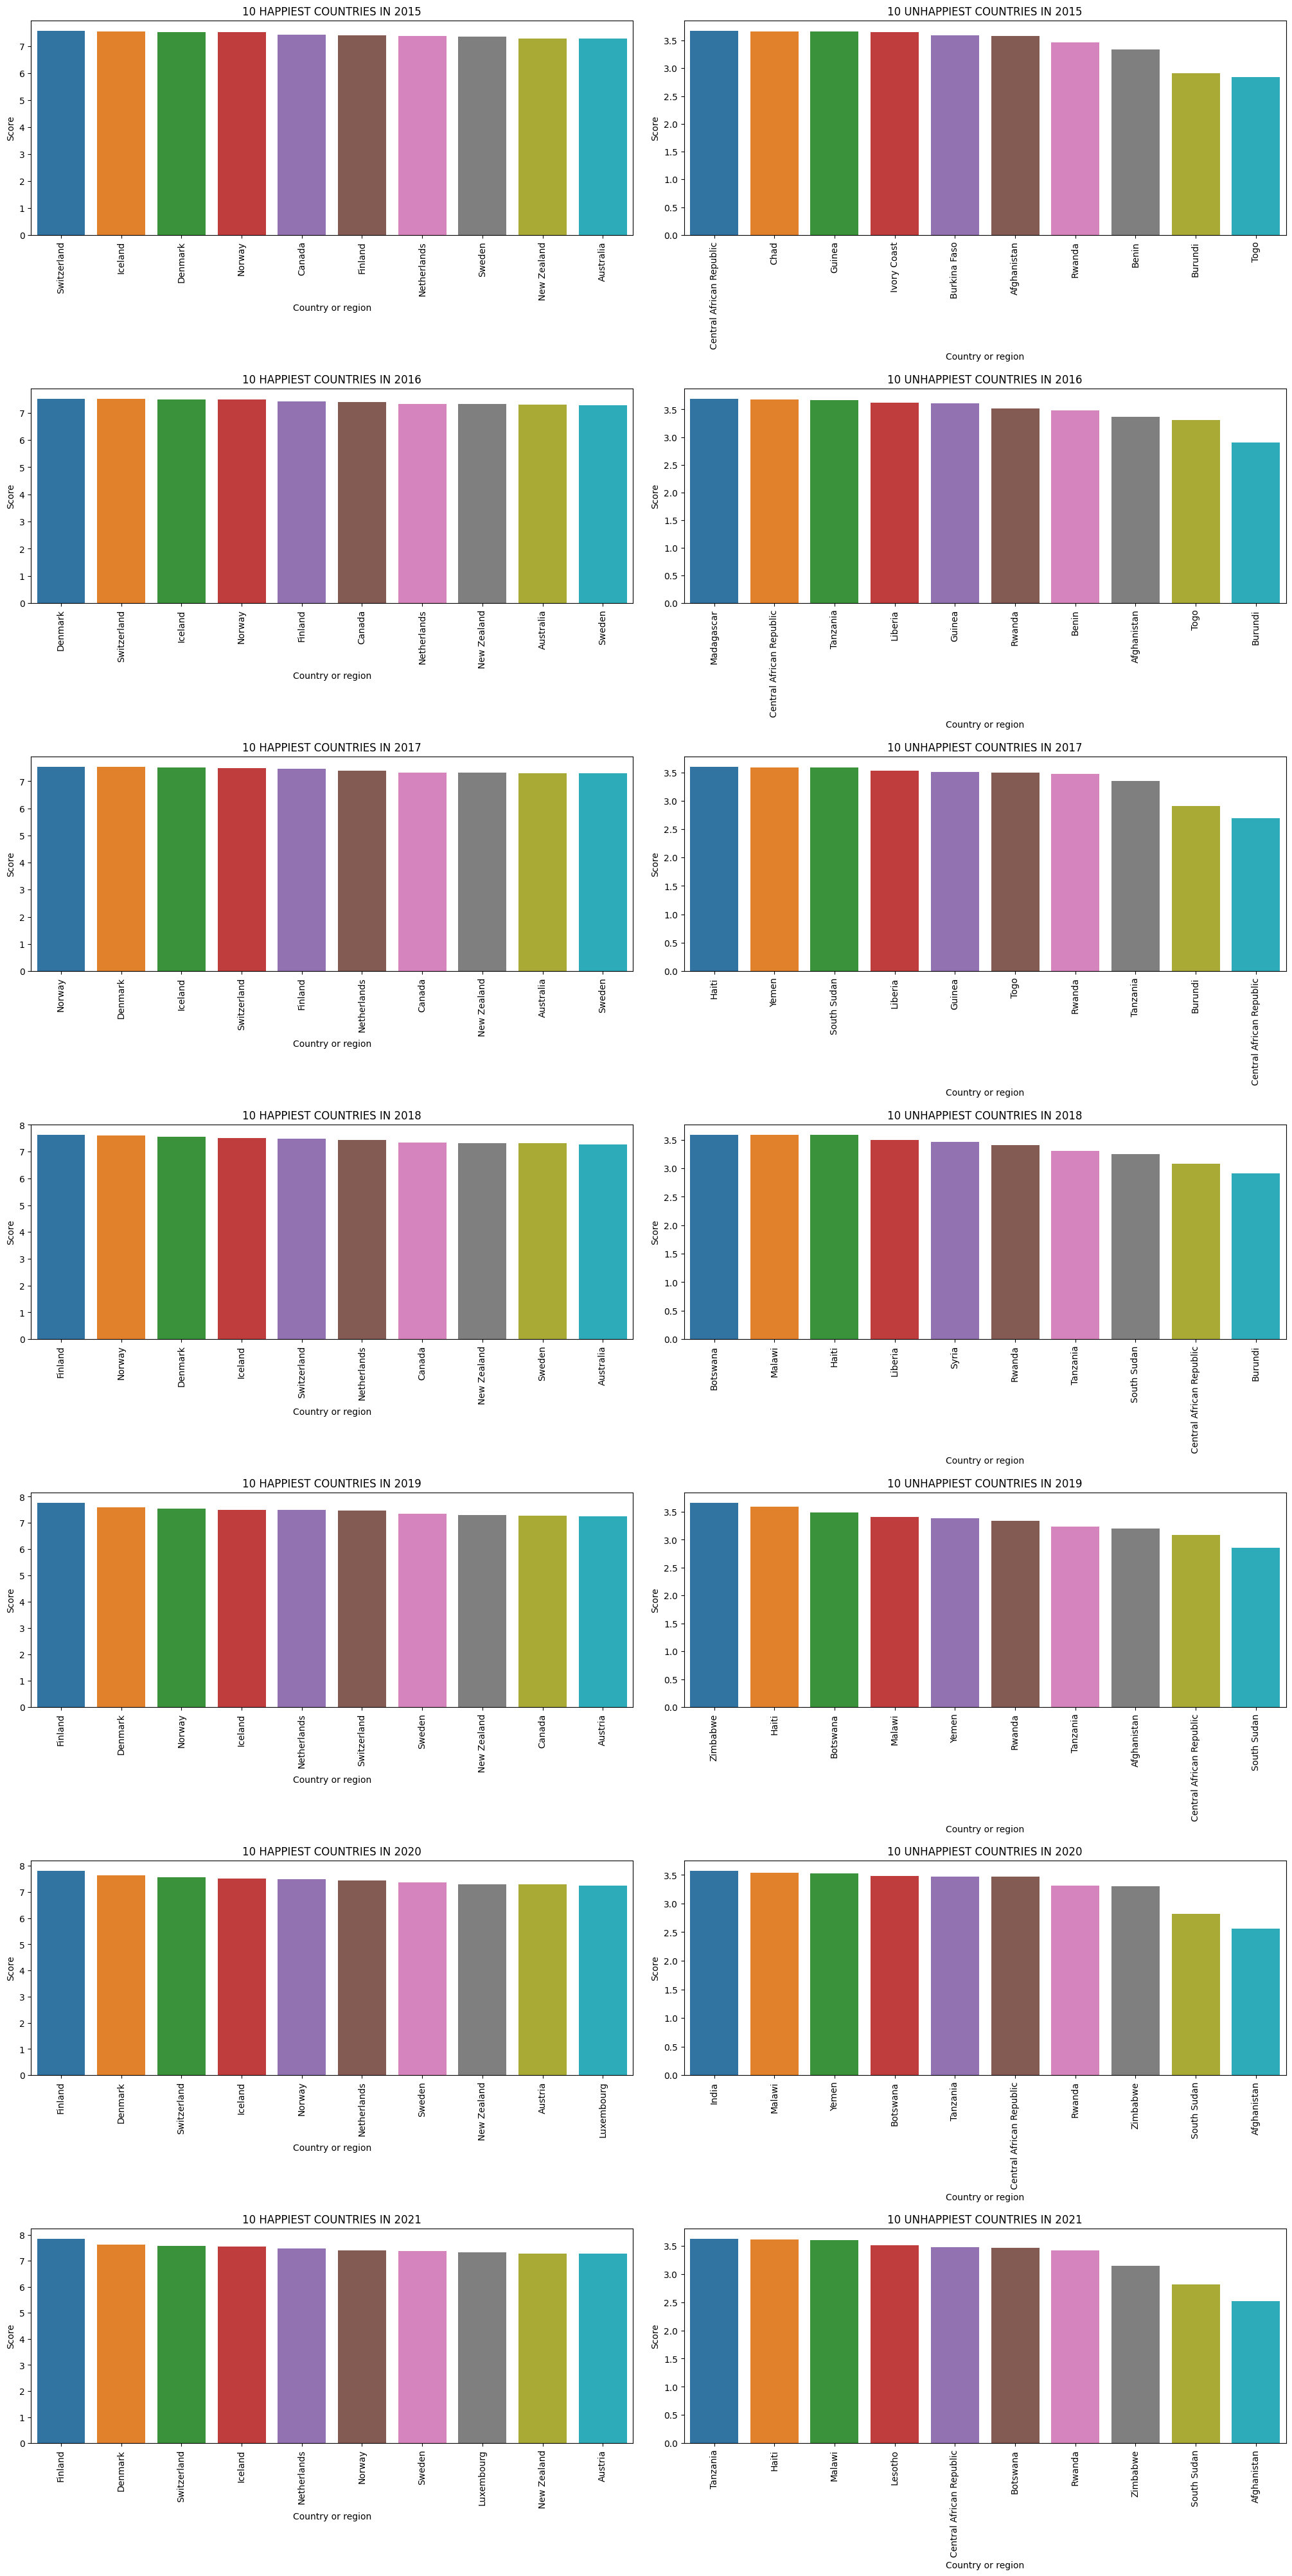

In [87]:
df1_10 = df1.iloc[:10:,:]
df2_10 = df2.iloc[:10:,:]
df3_10 = df3.iloc[:10:,:]
df4_10 = df4.iloc[:10:,:]
df5_10 = df5.iloc[:10:,:]
df6_10 = df6.iloc[:10:,:]
df7_10 = df7.iloc[:10:,:]
df1_b10 = df1.iloc[-10:,:]
df2_b10 = df2.iloc[-10:,:]
df3_b10 = df3.iloc[-10:,:]
df4_b10 = df4.iloc[-10:,:]
df5_b10 = df5.iloc[-10:,:]
df6_b10 = df6.iloc[-10:,:]
df7_b10 = df7.iloc[-10:,:]


f, axs = plt.subplots(7,2, figsize = (20,40), constrained_layout = True)
ax=sns.barplot(x="Country or region",y="Score", data=df1_10, ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 90)
ax=sns.barplot(x="Country or region",y="Score", data=df1_b10, ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 90)
ax=sns.barplot(x="Country or region",y="Score", data=df2_10, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 90)
ax=sns.barplot(x="Country or region",y="Score", data=df2_b10, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 90)
ax=sns.barplot(x="Country or region",y="Score", data=df3_10, ax = axs[2, 0])
ax.tick_params(axis = 'x', rotation = 90)
ax=sns.barplot(x="Country or region",y="Score", data=df3_b10, ax = axs[2, 1])
ax.tick_params(axis = 'x', rotation = 90)
ax=sns.barplot(x="Country or region",y="Score", data=df4_10, ax = axs[3, 0])
ax.tick_params(axis = 'x', rotation = 90)
ax=sns.barplot(x="Country or region",y="Score", data=df4_b10, ax = axs[3, 1])
ax.tick_params(axis = 'x', rotation = 90)
ax=sns.barplot(x="Country or region",y="Score", data=df5_10, ax = axs[4, 0])
ax.tick_params(axis = 'x', rotation = 90)
ax=sns.barplot(x="Country or region",y="Score", data=df5_b10, ax = axs[4, 1])
ax.tick_params(axis = 'x', rotation = 90)
ax=sns.barplot(x="Country or region",y="Score", data=df6_10, ax = axs[5, 0])
ax.tick_params(axis = 'x', rotation = 90)
ax=sns.barplot(x="Country or region",y="Score", data=df6_b10, ax = axs[5, 1])
ax.tick_params(axis = 'x', rotation = 90)
ax=sns.barplot(x="Country or region",y="Score", data=df7_10, ax = axs[6, 0])
ax.tick_params(axis = 'x', rotation = 90)
ax=sns.barplot(x="Country or region",y="Score", data=df7_b10, ax = axs[6, 1])
ax.tick_params(axis = 'x', rotation = 90)

axs[0, 0].title.set_text('10 HAPPIEST COUNTRIES IN 2015')
axs[0, 1].title.set_text('10 UNHAPPIEST COUNTRIES IN 2015')
axs[1, 0].title.set_text('10 HAPPIEST COUNTRIES IN 2016')
axs[1, 1].title.set_text('10 UNHAPPIEST COUNTRIES IN 2016')
axs[2, 0].title.set_text('10 HAPPIEST COUNTRIES IN 2017')
axs[2, 1].title.set_text('10 UNHAPPIEST COUNTRIES IN 2017')
axs[3, 0].title.set_text('10 HAPPIEST COUNTRIES IN 2018')
axs[3, 1].title.set_text('10 UNHAPPIEST COUNTRIES IN 2018')
axs[4, 0].title.set_text('10 HAPPIEST COUNTRIES IN 2019')
axs[4, 1].title.set_text('10 UNHAPPIEST COUNTRIES IN 2019')
axs[5, 0].title.set_text('10 HAPPIEST COUNTRIES IN 2020')
axs[5, 1].title.set_text('10 UNHAPPIEST COUNTRIES IN 2020')
axs[6, 0].title.set_text('10 HAPPIEST COUNTRIES IN 2021')
axs[6, 1].title.set_text('10 UNHAPPIEST COUNTRIES IN 2021')

Finland's happiness score has improved since 2015, from an overall ranking of 6th to 1st on 2018 which they have managed to maintain.  Afghanistan on te other hand has experienced a large variety of movement in their ranking, from bottom 5 in 2015 and 2016, to outside of the bottom 10 in 2017 and 2018, bottom 3 in 2019 and the lowest happiness score in 2020 and 2021. A large reason is due to the war and the impact it has had on the country and the lives of the people living in the country.

We will compare the happiness score of these two countries over the seven year period; 

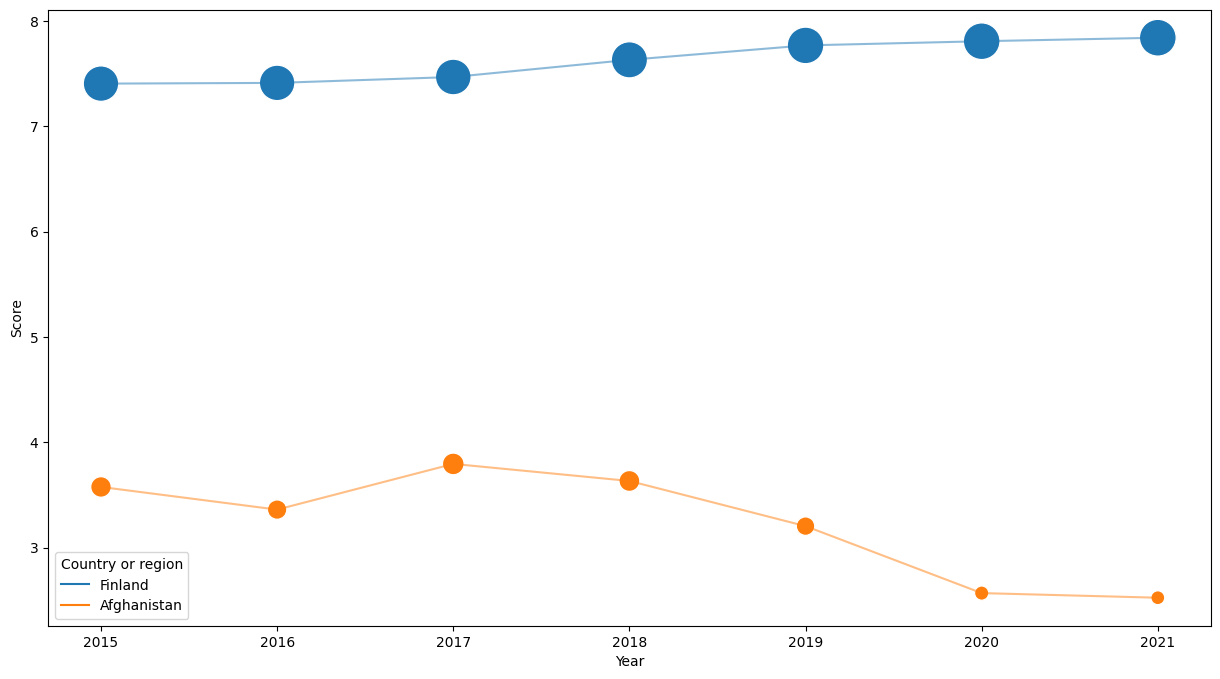

In [88]:
data4=happy_data[happy_data['Country or region'].isin(['Afghanistan','Finland'])].loc[:,'Country or region':'Score']
data3=happy_data[happy_data['Country or region'].isin(['Afghanistan','Finland'])]
fig=plt.figure(figsize=(15,8))
ax=plt.subplot()
ax=sns.lineplot(data=data3,x='Year', y='Score', alpha=0.5, hue='Country or region')
ax=sns.scatterplot(data=data3,x='Year', y='Score',hue='Country or region', size='Score', sizes=(100,700), legend ='')

Finland has experienced a constant directly positive rise in happiness score and ranking since 2015 whilst Afghanistan has experienced the opposite, a constant decrease in happiness score from 2017 to 2021. 

In [89]:
def comp_country(country1, country2):
    data3=happy_data[happy_data['Country or region'].isin([country1,country2])]
    fig=plt.figure(figsize= (20,15))
    plt.suptitle("Comparing the Features that contribute for Happiness index for {} vs {}".format(country1, country2),family='Serif', weight='bold', size=20)
    count=0 
    for i in cols.index:    
        ax=plt.subplot(421+count)
        sns.lineplot(data=data3,x='Year',y=i, hue='Country or region', color=color[-2])
        count=count+1
    return

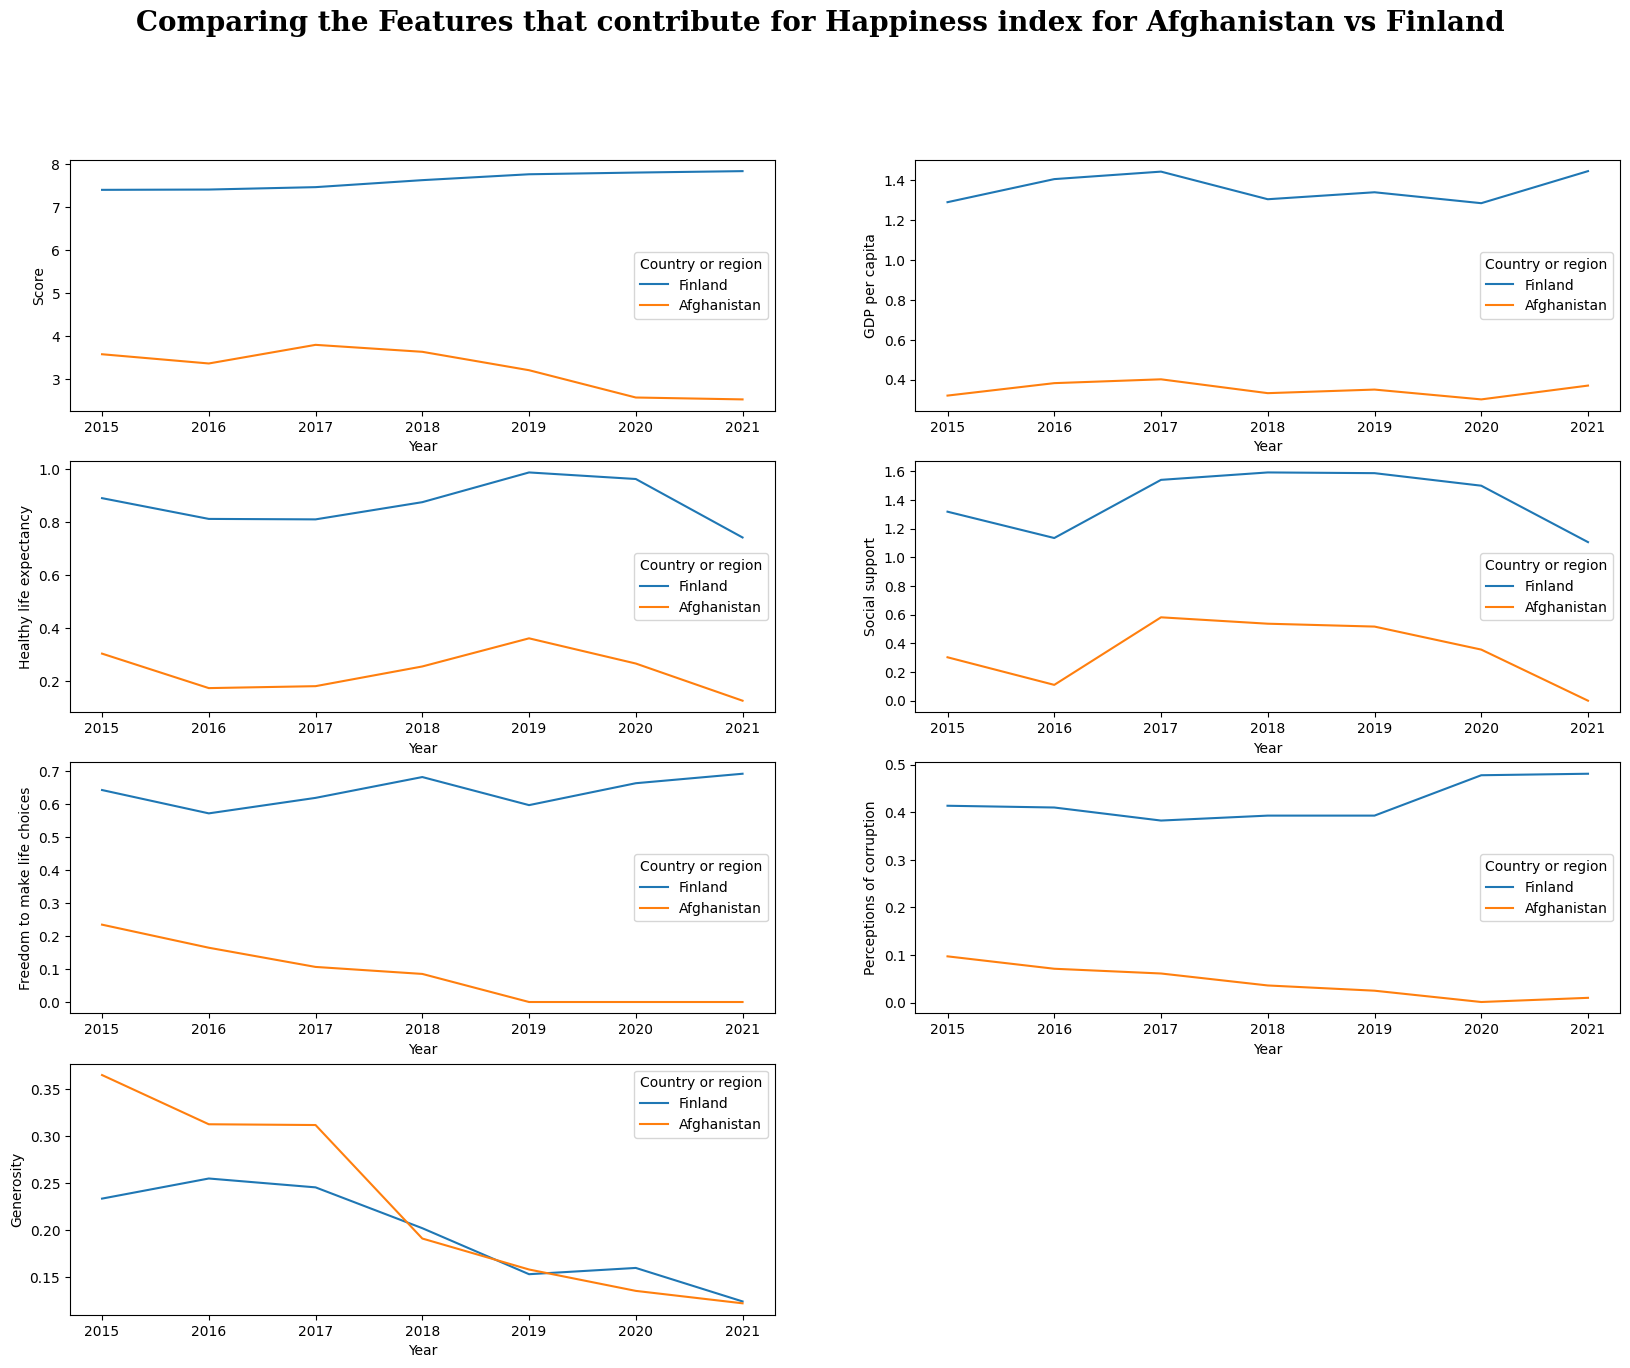

In [90]:
comp_country('Afghanistan','Finland')

It is fascinating that parameters of Healthy life expectancy, Social Support and GPD per Capita of the highest and lowest ranked countries follow the same trend on the extremes of the score level. However, as I eluded earlier, Afghanistan's GPD per Capita is definitively lower than that of Finland, as well undergoing a war, yet the Generosity parameter coincides. 

Understandably, due to the crisis Afghanistan is currently undergoing the Perceptions of Corruption, Healthy life expectancy, Social Support and Freedom of Life choices has decreased over the period. 

As of interest, I would like to review the change in Parameters of South Africa, a country I grew up in and account for a high level of happiness amongst the people, as compared to Finland - the Happiest Country in the World

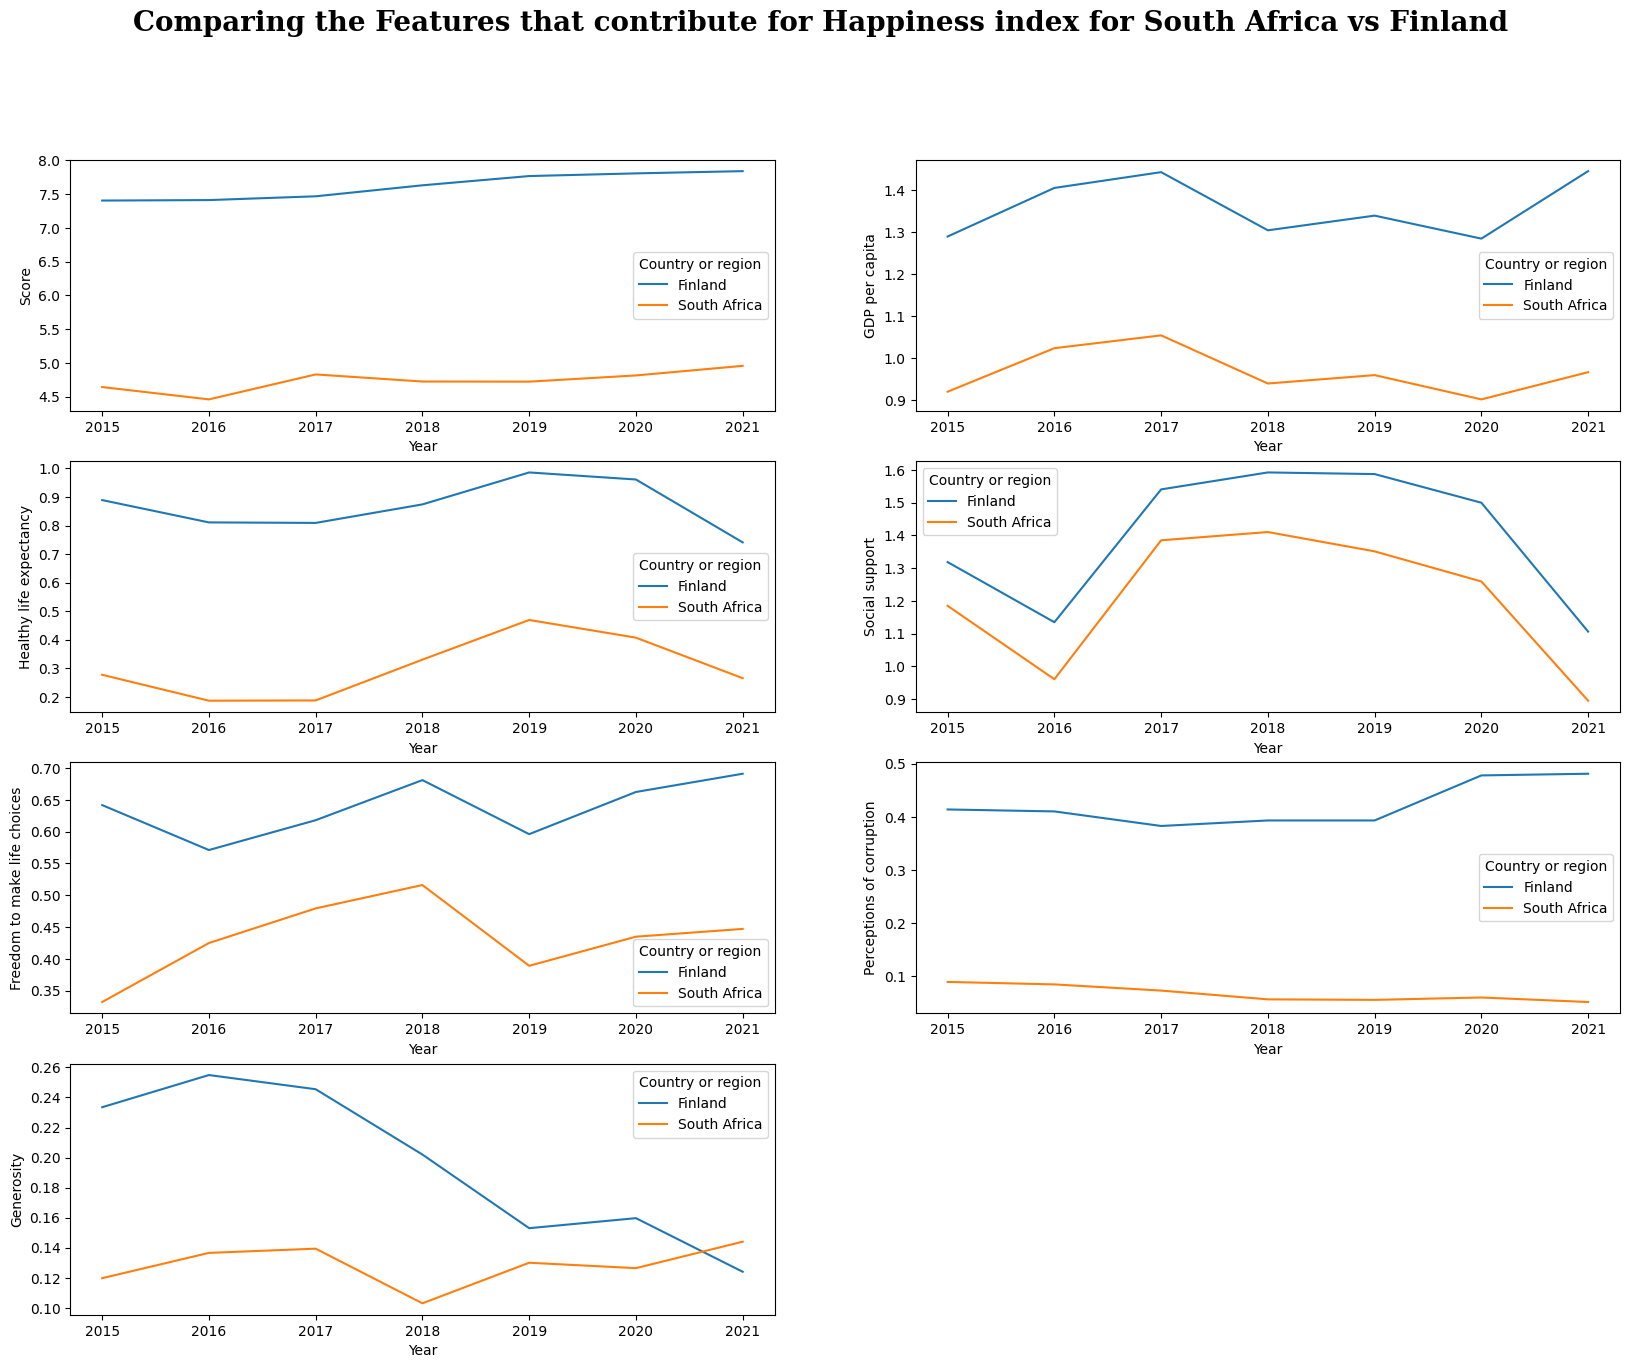

In [91]:
comp_country('South Africa','Finland')

Once again,  is fascinating that parameters of Healthy life expectancy, Social Support and GPD per Capita of the two countries follow the same trend, however in this case, dspite their differences, both countries exhibit similar trends in GDP per capita. However, the reasons behind this similarity are multifaceted and may include historical, social, and economic factors. It’s essential to consider various aspects, such as economic policies, infrastructure, education, and governance, to fully understand these trends. It is this trend that impact the overall happiness scoting of South Africa the most.

It is well known that South Africa has a higher level of corruption, hence the perception of corruption scoring is as expected. 

The generosity of South Africa is unlike that trended previously inwhich the lower ranked countriy out performs that of the higher ranked country consitantly.

However, the Happiness Score of South Africa is of surprise. Living in the country for over 25 years, the ambience and the people create a very happy environment, using the parameters however deliver a different perception of that. Evidently, this is due to the highly correlated parameters of which the score is impacted. If the country was able to improve of the GPD per Capita, Social Support and Healthy Life Expectancy, as it follows trends of Finland closely it will deliver an impactful improvement in Happiness Score. 

In [92]:
cols = ['Score', 'GDP per capita','Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity','Perceptions of corruption']
happy_data[cols] = happy_data[cols].astype(float)

In [93]:
scores = happy_data.groupby(by = ['Country or region']).mean()
scores.head(25)
change_df = scores.copy()
change_df['Happiness Score Change'] = change_df['Score 2021'] - change_df['Score 2019']
change_df.head(20)

Overall rank     Score  GDP per capita  \
Country or region                                                
Afghanistan               149.857143  3.236271        0.350896   
Albania                   104.285714  4.794671        0.943974   
Algeria                    77.142857  5.461443        0.993524   
Argentina                  38.285714  6.314386        1.106520   
Armenia                   116.571429  4.560829        0.857133   
Australia                  10.428571  7.255257        1.391117   
Austria                    11.285714  7.181743        1.400142   
Azerbaijan                 86.000000  5.211686        1.054785   
Bahrain                    39.142857  6.206186        1.379729   
Bangladesh                111.000000  4.679829        0.544448   
Belarus                    70.142857  5.580557        1.081136   
Belgium                    18.285714  6.900643        1.376548   
Benin                     124.857143  4.252286        0.393853   
Bolivia                    60.714286  5.789929        0.772755   
Bosnia and Herzegovina     82.428571  5.328014        0.936981   
Botswana                  142.000000  3.727986        1.052065   
Brazil                     26.000000  6.570657        1.020973   
Bulgaria                  107.000000  4.780071        1.094319   
Burkina Faso              127.428571  4.281671        0.319966   
Burundi                   149.857143  3.277900        0.044605   

                        Social support  Healthy life expectancy  \
Country or region                                                 
Afghanistan                   0.343600                 0.237941   
Albania                       0.733448                 0.775830   
Algeria                       1.039862                 0.660386   
Argentina                     1.286764                 0.757179   
Armenia                       0.892420                 0.692873   
Australia                     1.371168                 0.913751   
Austria                       1.331323                 0.885905   
Azerbaijan                    1.025766                 0.624343   
Bahrain                       1.204521                 0.732441   
Bangladesh                    0.654355                 0.596530   
Belarus                       1.297844                 0.686632   
Belgium                       1.312020                 0.875179   
Benin                         0.301825                 0.271482   
Bolivia                       1.057167                 0.549282   
Bosnia and Herzegovina        1.006450                 0.748369   
Botswana                      1.049536                 0.360877   
Brazil                        1.274860                 0.677406   
Bulgaria                      1.287074                 0.720078   
Burkina Faso                  0.868584                 0.260843   
Burundi                       0.402808                 0.215465   

                        Freedom to make life choices  \
Country or region                                      
Afghanistan                                 0.084231   
Albania                                     0.401776   
Algeria                                     0.156447   
Argentina                                   0.496134   
Armenia                                     0.285460   
Australia                                   0.613442   
Austria                                     0.589716   
Azerbaijan                                  0.413780   
Bahrain                                     0.552402   
Bangladesh                                  0.514067   
Belarus                                     0.303492   
Belgium                                     0.526088   
Benin                                       0.422825   
Bolivia                                     0.561992   
Bosnia and Herzegovina                      0.226333   
Botswana                                    0.500161   
Brazil                                      0.458927   
Bulgaria                        

In [94]:
change_df.sort_values(by = 'Happiness Score Change',inplace=True, ascending = False)
change_df.reset_index(inplace=True)
change_df.tail(20)

Country or region  Overall rank     Score  GDP per capita  \
136          Turkmenistan     77.285714  5.442300        1.041769   
137          North Cyprus     65.857143  5.700071        1.278312   
138           El Salvador     41.571429  6.147186        0.820281   
139                 India    130.428571  4.125900        0.732164   
140            Mauritania    126.857143  4.339514        0.578446   
141               Ecuador     52.142857  5.949886        0.918183   
142  United Arab Emirates     22.285714  6.724686        1.601746   
143                 Chile     29.142857  6.478214        1.166232   
144                Mexico     23.857143  6.629714        1.078170   
145               Morocco     91.857143  5.124829        0.797730   
146               Lesotho    129.428571  4.054114        0.448409   
147               Algeria     77.142857  5.461443        0.993524   
148                Turkey     81.857143  5.308114        1.163192   
149               Nigeria     97.571429  5.017157        0.697738   
150                Jordan     96.142857  4.989486        0.889129   
151              Zimbabwe    139.000000  3.782457        0.371832   
152          Sierra Leone    122.714286  4.367343        0.301010   
153               Lebanon     98.428571  5.014786        1.015649   
154           Afghanistan    149.857143  3.236271        0.350896   
155              Pakistan     80.857143  5.335329        0.656182   

     Social support  Healthy life expectancy  Freedom to make life choices  \
136        1.358782                 0.520299                      0.456670   
137        1.075248                 0.911107                      0.470046   
138        1.044906                 0.659303                      0.462669   
139        0.557254                 0.488314                      0.501548   
140        1.036693                 0.344238                      0.151990   
141        1.116281                 0.749336                      0.501839   
142        1.065782                 0.734685                      0.573857   
143        1.183379                 0.827449                      0.405655   
144        1.067329                 0.760493                      0.474646   
145        0.606425                 0.650865                      0.412369   
146        1.068014                 0.072454                      0.374624   
147        1.039862                 0.660386                      0.156447   
148        1.129629                 0.697406                      0.253883   
149        0.951398                 0.111415                      0.396130   
150        1.067184                 0.675532                      0.416588   
151        0.962210                 0.284293                      0.336098   
152        0.763833                 0.078788                      0.355425   
153        1.004995                 0.759990                      0.281353   
154        0.343600                 0.237941                      0.084231   
155        0.620019                 0.438672                      0.281840   

     Perceptions of corruption  Generosity    Year  Score 2015  Score 2016  \
136                   0.140555    0.253931  2018.0    0.792571    0.808286   
137                   0.168534    0.222417  2018.0    0.813571    0.824429   
138                   0.106700    0.095269  2018.0    0.875714    0.866857   
139                   0.093422    0.228806  2018.0    0.652143    0.629143   
140                   0.132482    0.162233  2018.0    0.633714    0.600143   
141                   0.122451    0.118324  2018.0    0.853571    0.853714   
142                   0.241592    0.265113  2018.0    0.985857    0.939000   
143                   0.082191    0.239260  2018.0    0.952857    0.957857   
144                   0.124225    0.099596  2018.0    1.026714    0.968286   
145                   0.081807    0.040070  2018.0    0.716143    0.735857   
146                   0.091380    0.130555  2018.0    0.69971

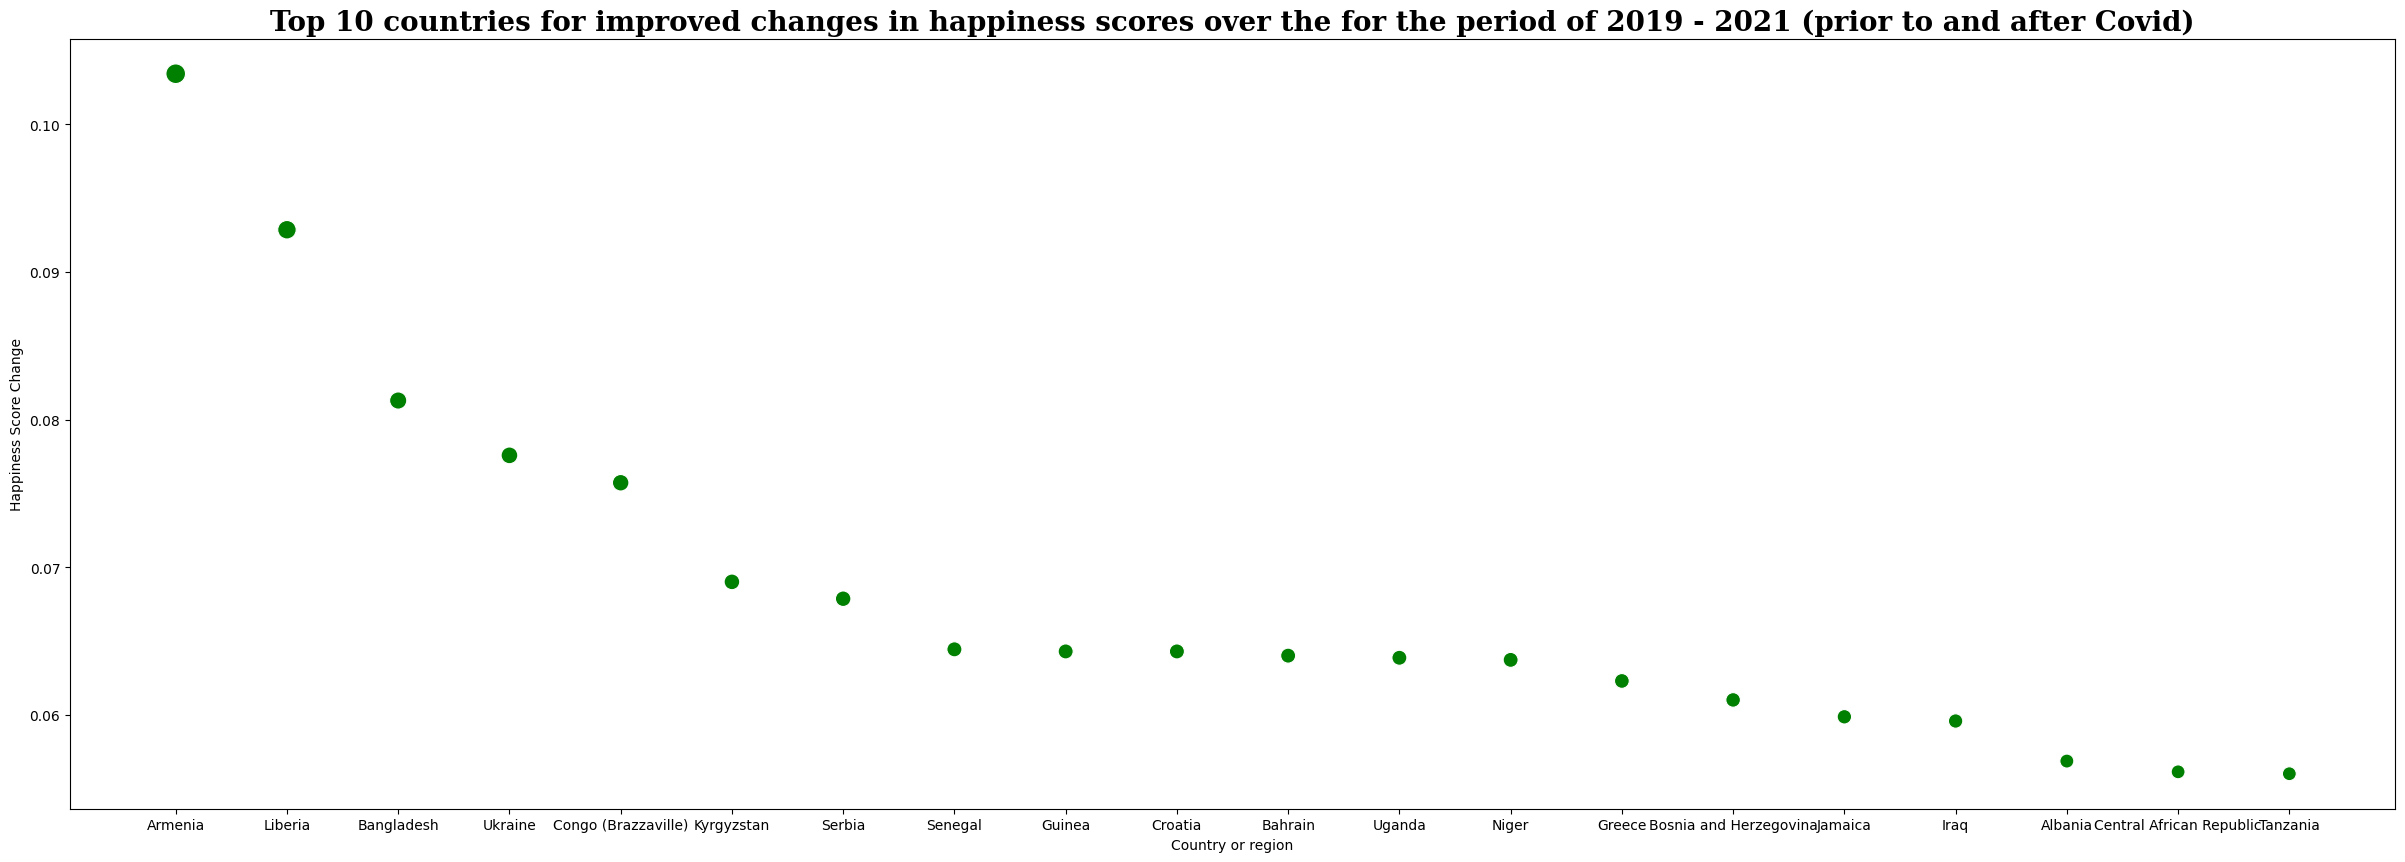

In [95]:
top_change = change_df.head(20)
low_change = change_df.tail(20)
fig=plt.figure(figsize=(30,10))
plt.title("Top 10 countries for improved changes in happiness scores over the for the period of 2019 - 2021 (prior to and after Covid)",family='Serif', weight='bold', size=20)
sns.scatterplot(data=top_change, y='Happiness Score Change', x ='Country or region', size='Happiness Score Change',sizes=(100, 200), legend ='', color = 'Green');

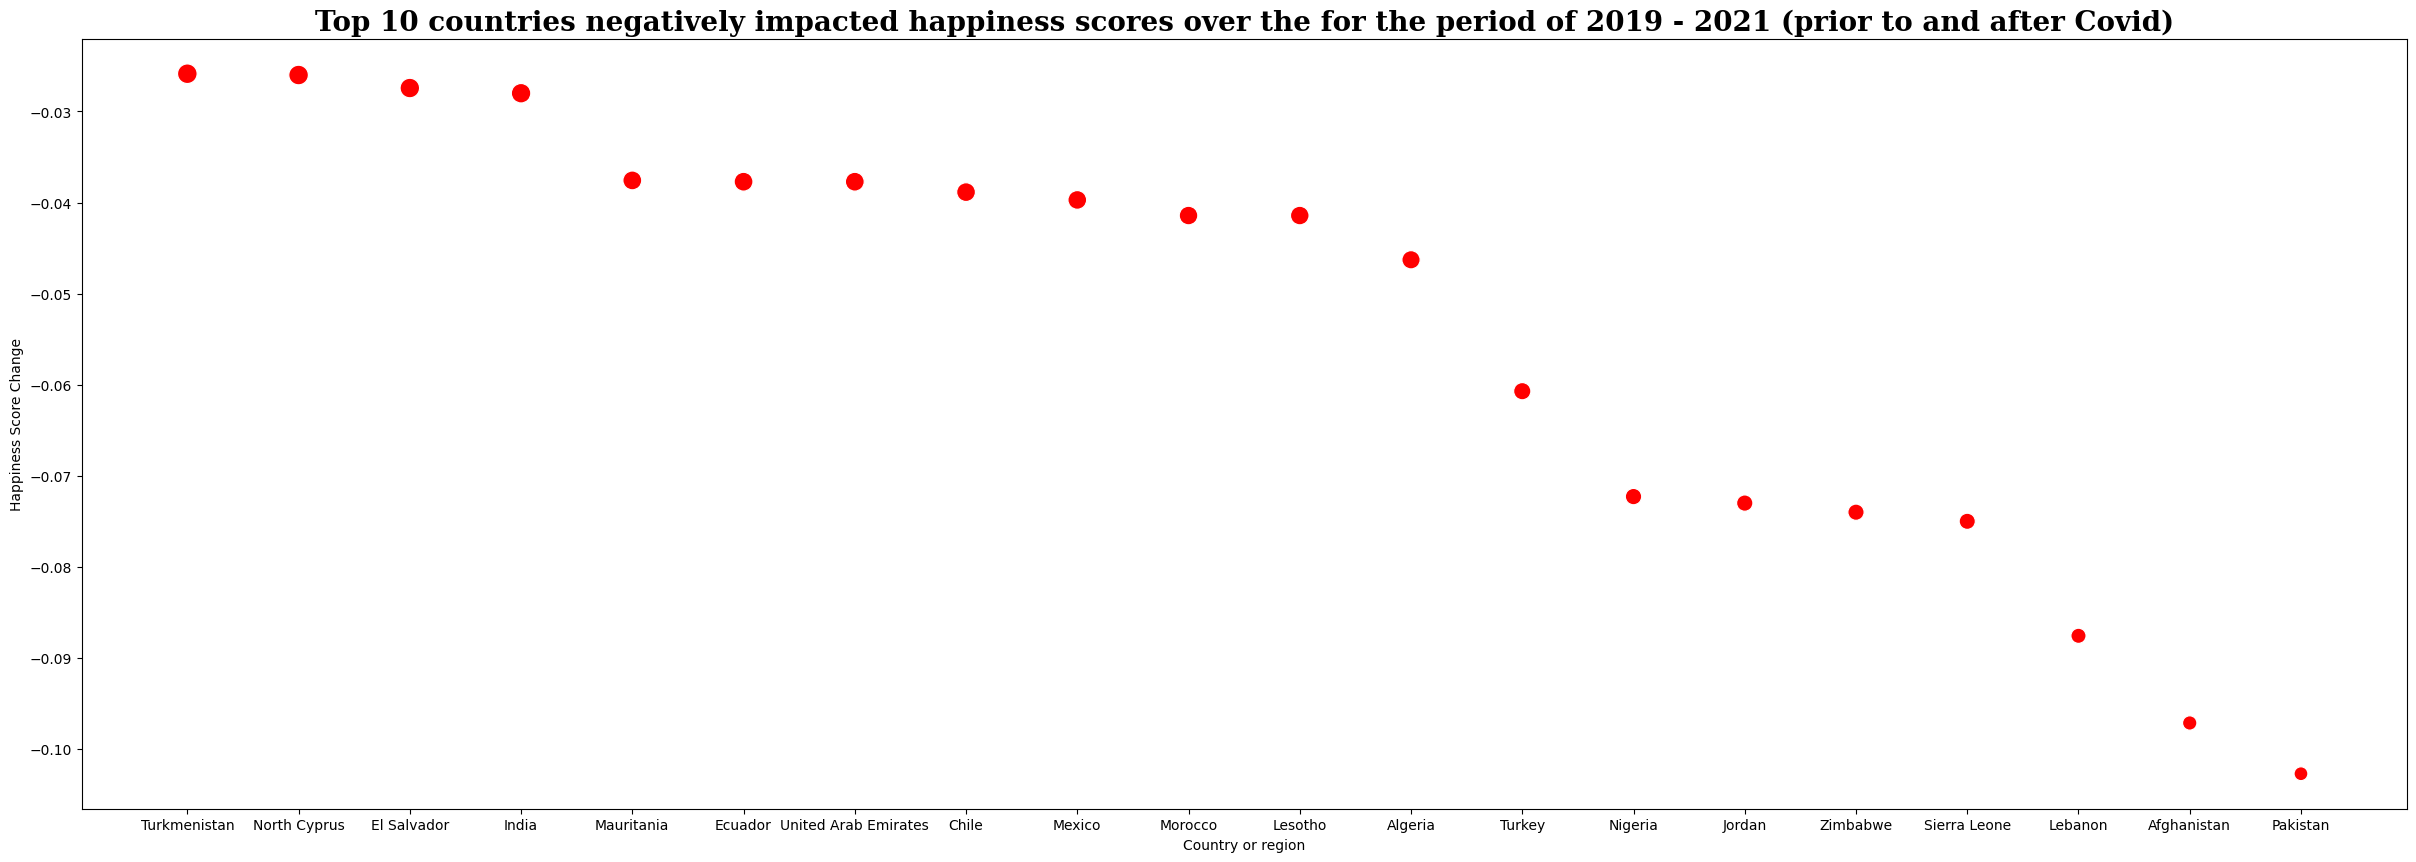

In [96]:
fig=plt.figure(figsize=(30,10))
plt.title("Top 10 countries negatively impacted happiness scores over the for the period of 2019 - 2021 (prior to and after Covid)",family='Serif', weight='bold', size=20)
sns.scatterplot(data=low_change, y='Happiness Score Change', x ='Country or region', size='Happiness Score Change',sizes=(100, 200), legend ='', color = 'Red');

It is concerning that the most negatively impacted countries, highest negative change in happiness score between the period of 2019-2021 - i.e. prior to and after covid, are the lowest ranked countries. A factor a large majority of these lower ranked countries are experiencing a high level of poverty, corruption or crisis like that of a war resulting in a political and economical crisis. Due to the high correlation in happiness score and parameters like that of GPD per Capita and Healthy lif expectancy which are negatively impacted by the political and economical crisis, these countries only become unhappier. Specifically during covid, due to the political and economical crisis, these countries governments were unprepared for population support therefore covid created a higher level of stress and consequently a lower level of happiness. These countries were unable to benefit from the improved life and wellbeing balance the wealthier countries experienced during the covid isolation periods.  

In [97]:
map_data = dict(
        type = 'choropleth',
        colorscale = 'rainbow',
        marker_line_width=1,
        locations = df7['Country or region'],
        locationmode = "country names",
        z = df7['Score'],
        text = df7['Country or region'],
        colorbar = {'title' : 'Score'},
      )
layout = dict(title = '2021 Happiness Score Map',
              geo = dict(projection = {'type':'mercator'}, showocean = False, showlakes = True, showrivers = True, )
             )
choromap = go.Figure(data = [map_data],layout = layout)
iplot(choromap,validate=False)

# Conclusion


The analysis illustrates that the most impactful parameters which impact the happiness score are the GPD per Capita, Social Support and Healthy Life Expectancy.

Wealthier contries handled covid better which resulted in an improvement in overall happiness for those countries. Wealthier countries consitutions handled covid better than those less wealthy as they were more prepared in the right strategy for poulation support - social well being and economical wealth. These tend to be the higher ranked countries, whom were highly ranked prior to covid but since being more posiively impacted by covid have achieved higher levels of happiness.

Countries whom previously tanked lower on the happiness score ladder, experienced futher struggles in covid in their countries which impacted their happiness levels negatively, lowering their scores.Less wealthy countries income enequality pervailed and those less wealthy were more impacted. These people were not only socially distant reducing their social support but lost their jobs and income, decreasing another major contributing factor - the GPD per Capita. Due to the lack of infrastructure these countries experienced a larger proportion of deaths at this time which too impacted the correlating parameter of Healthy life expectancy.

It is noted that during covid mental health awareness spikes, creating initially a large decrease in population mental well being but due to the awareness and infrastructur built to support based off covid and lack of scocial support lead to an improvement in the mean population mental health which can be seen in the increase in mean happiness score from 2020 and 2021.

Overall, the impact of more countries were positive which moved the mean of the population to the same level as 2015, after a continuous dip in happiness scores prior to covid.  

The most impactful and suprising take from the analysis - the generosity of that of the unhappy countries, which trend to have the lowest GPD per Capita,  is higher than that of the happier countries which is unfortunate as the happer countries tend to have a higher GPD per capita and therefore more means to be generous. 